# Section 4: Data and Approach (Run from Section 4.4)

Dear Prof, kindly run the code from Section 4.4 onwards! Do rename the path to your corresponding file path too.

## Imports

In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as plt
sb.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
path = r'/Users/paullow/Documents/0. UNI WORK!!/5. Analytics 2/Project/BC2407_Submission_Sem03_Team2'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))

# fullData = pd.read_csv('fullDataCleaned.csv')

Current working directory: C:\Users\roydo\Desktop\BC2407 Analytics 2\Project


# Section 4.2: Data Merging and Preparation

## Standardising datatypes

In [2]:
afrData = pd.read_csv('train_data.csv',header = 0)
afrData = afrData[afrData['Severity of Illness'].notna()]
afrData.head()
print(len(afrData))

318438


In [3]:
nyData = pd.read_csv(
         'Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv',
         header=0, 
         )

C:\NTU Tutorials\Year 1\Sem 2\Data Science and AI\DSAI\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
nyData = nyData[nyData['Length of Stay'].notna()]
nyData = nyData[nyData['APR Severity of Illness Description'].notna()]
nyData.drop(['Type of Admission'], axis=1)
nyData['Length of Stay'] = nyData['Length of Stay'].astype('str')
print(nyData['Length of Stay'].isna().sum())
print(len(nyData))

0
2346820


In [5]:
nyData

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,"5,333.90","4,818.42"
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,"4,865.99","4,588.78"
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,"5,901.54","5,559.56"
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,"3,619.08","3,567.25"
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,"3,185.87","3,167.89"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,"43,494.00","5,588.26"
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,"16,662.00","2,907.62"
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,"7,142.00","1,692.55"
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,"13,070.00","2,447.75"


In [6]:
nyData['Length of Stay'] = nyData['Length of Stay'].str.replace(' +','',regex=True)
nyData['Length of Stay'] = nyData['Length of Stay'].str.replace('+','',regex=True)
print((nyData['Length of Stay'] == '120 +').sum())
print((nyData['Length of Stay'] == '120+').sum())
nyData['Length of Stay'] = nyData['Length of Stay'].astype('int')
nyData['Length of Stay'] = nyData['Length of Stay'].astype('float') * 1.5
#nyData['Length of Stay'].str.replace(' +','', regex = True)    

0
0


In [7]:
print(nyData['Length of Stay'].isna().sum())
print((nyData['Length of Stay'] == '120+').sum())
print((nyData['Length of Stay'] == '120 +').sum())
print(len(nyData))

0
0
0
2346820


## Merging of columns
1. Rename nyData Severity Column to 'Severity of Illness'
2. Change Major to Moderate
3. Sample rows to match afrData

In [8]:
# Extracting of features
catFeatures = ['Length of Stay','Age Group','Gender','Patient Disposition',
            'CCS Diagnosis Code','CCS Procedure Code','APR DRG Code','APR MDC Code','APR Severity of Illness Description',
            'APR Risk of Mortality','APR Medical Surgical Description','Payment Typology 1','Payment Typology 2','Payment Typology 3']
contFeatures = ['Total Charges','Total Costs']
nyData = nyData[catFeatures + contFeatures]
#Convert categorical variables
for cat in catFeatures:
    nyData[cat] = nyData[cat].astype('category')


for cont in contFeatures:
    nyData[cont] = nyData[cont].str.replace(',','')
    nyData[cont] = nyData[cont].astype('float')
print(nyData.dtypes)

<ipython-input-8-560c984ce367>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyData[cat] = nyData[cat].astype('category')
<ipython-input-8-560c984ce367>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyData[cont] = nyData[cont].str.replace(',','')
<ipython-input-8-560c984ce367>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Length of Stay                         category
Age Group                              category
Gender                                 category
Patient Disposition                    category
CCS Diagnosis Code                     category
CCS Procedure Code                     category
APR DRG Code                           category
APR MDC Code                           category
APR Severity of Illness Description    category
APR Risk of Mortality                  category
APR Medical Surgical Description       category
Payment Typology 1                     category
Payment Typology 2                     category
Payment Typology 3                     category
Total Charges                           float64
Total Costs                             float64
dtype: object


In [9]:
nyData = nyData.rename(columns={'APR Severity of Illness Description': 'Severity of Illness'})
nyData['Severity of Illness'] = nyData['Severity of Illness'].replace('Major','Moderate')
nyData['Severity of Illness'].unique()

['Moderate', 'Minor', 'Extreme']
Categories (3, object): ['Moderate', 'Minor', 'Extreme']

In [10]:
#Number of values in each Severity category for afrData
afrData['Severity of Illness'].value_counts() 

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [11]:
nyData['Severity of Illness'].value_counts()

Moderate    1414386
Minor        785636
Extreme      146798
Name: Severity of Illness, dtype: int64

In [12]:
#Extract 85872 Minor from nyData
nyMinor = nyData[nyData['Severity of Illness'] == 'Minor']
nyMinor = nyMinor.sample(n = 85872)
#Extract 175843 Moderate from nyData
nyModerate = nyData[nyData['Severity of Illness'] == 'Moderate']
nyModerate = nyModerate.sample(n = 175843)
#Extract 56723 Extreme from nyData
nyExtreme = nyData[nyData['Severity of Illness'] == 'Extreme']
nyExtreme = nyExtreme.sample(n = 56723)

frames = [nyMinor,nyModerate,nyExtreme]
newNYData = pd.concat(frames)
newNYData['Severity of Illness'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [13]:
#Give unique ID to each row
afrData = afrData.sort_values(by = 'Severity of Illness')
#afrID = pd.DataFrame({'ID': range(len(afrData))})
#afrID
#afrData = pd.concat([afrID,afrData])

newNYData = newNYData.sort_values(by = 'Severity of Illness')
#nyID = pd.DataFrame({'ID': range(len(newNYData))})
#newNYData = pd.concat([nyID,newNYData])

print("Length of afrData: ", len(afrData))
print("Length of NYData: ", len(newNYData))

Length of afrData:  318438
Length of NYData:  318438


In [14]:
# Inner join dataset
afrData = afrData.reset_index()
afrData = afrData.drop(columns = ["Severity of Illness"])
newNYData = newNYData.reset_index()
fullData = pd.concat([afrData,newNYData], axis = 1)

In [15]:
fullData

,index,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,...,APR DRG Code,APR MDC Code,Severity of Illness,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Total Charges,Total Costs
0,0,1,8,c,3,Z,3,radiotherapy,R,F,...,49,1,Extreme,Extreme,Medical,Medicare,Private Health Insurance,NaN,213055.22,55810.62
1,117224,117225,6,a,6,X,3,gynecology,R,F,...,136,4,Extreme,Extreme,Medical,Medicaid,Self-Pay,NaN,117580.69,47617.64
2,117223,117224,28,b,11,X,3,gynecology,R,F,...,460,11,Extreme,Major,Medical,Medicare,Medicare,Blue Cross/Blue Shield,68772.67,13219.23
3,117222,117223,17,e,1,X,3,gynecology,R,E,...,447,11,Extreme,Extreme,Surgical,Medicare,Medicare,Medicaid,514242.62,127996.03
4,117221,117222,4,a,4,X,3,gynecology,R,F,...,142,4,Extreme,Major,Medical,Medicaid,Medicaid,NaN,39195.54,23770.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,191439,191440,26,b,2,Y,4,gynecology,Q,D,...,560,14,Moderate,Minor,Medical,Medicaid,Medicaid,Self-Pay,29295.60,9948.16
318434,191440,191441,18,d,13,Y,4,gynecology,R,B,...,47,1,Moderate,Minor,Medical,Medicare,NaN,NaN,18424.34,4920.83
318435,191441,191442,18,d,13,Y,3,gynecology,R,B,...,560,14,Moderate,Minor,Medical,Medicaid,Medicaid,NaN,22206.05,7809.33
318436,191443,191444,19,a,7,Y,2,gynecology,R,C,...,136,4,Moderate,Major,Medical,Blue Cross/Blue Shield,NaN,NaN,41444.96,11248.80


In [16]:
fullData.columns

Index(['index', 'case_id', 'Hospital_code', 'Hospital_type_code',
       'City_Code_Hospital', 'Hospital_region_code',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Bed Grade', 'patientid', 'City_Code_Patient',
       'Type of Admission', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'index', 'Length of Stay', 'Age Group',
       'Gender', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'Severity of Illness', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Total Charges',
       'Total Costs'],
      dtype='object')

## Full Feature extraction (From combined dataset)

In [17]:
contFeatures = ['Length of Stay','Available Extra Rooms in Hospital','Admission_Deposit','Total Charges','Total Costs','Visitors with Patient']
catFeatures = ['Type of Admission','Age','Severity of Illness','Ward_Type','CCS Diagnosis Code','CCS Procedure Code','Patient Disposition',
                'APR DRG Code','APR MDC Code','APR Risk of Mortality','APR Medical Surgical Description','Payment Typology 1',
                'Payment Typology 2','Payment Typology 3']

fullData = fullData[contFeatures + catFeatures]
#Convert categorical variables
for cat in catFeatures:
    fullData[cat] = fullData[cat].astype('category')

for cont in contFeatures:
    #fullData[cont] = fullData[cont].str.replace(',','')
    fullData[cont] = fullData[cont].astype('int')
fullData.head()

<ipython-input-17-1c1868ec7b6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullData[cat] = fullData[cat].astype('category')
<ipython-input-17-1c1868ec7b6b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullData[cont] = fullData[cont].astype('int')


,Length of Stay,Available Extra Rooms in Hospital,Admission_Deposit,Total Charges,Total Costs,Visitors with Patient,Type of Admission,Age,Severity of Illness,Ward_Type,CCS Diagnosis Code,CCS Procedure Code,Patient Disposition,APR DRG Code,APR MDC Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3
0,15,3,4911,213055,55810,2,Emergency,51-60,Extreme,R,95,216,Hospice - Medical Facility,49,1,Extreme,Medical,Medicare,Private Health Insurance,NaN
1,22,3,7666,117580,47617,3,Trauma,41-50,Extreme,R,19,216,Expired,136,4,Extreme,Medical,Medicaid,Self-Pay,NaN
2,13,3,4539,68772,13219,2,Emergency,41-50,Extreme,R,157,193,Skilled Nursing Home,460,11,Major,Medical,Medicare,Medicare,Blue Cross/Blue Shield
3,43,3,6304,514242,127996,3,Trauma,41-50,Extreme,R,99,61,Skilled Nursing Home,447,11,Extreme,Surgical,Medicare,Medicare,Medicaid
4,10,3,8626,39195,23770,3,Emergency,41-50,Extreme,R,133,216,Short-term Hospital,142,4,Major,Medical,Medicaid,Medicaid,NaN


In [18]:
#Creation of delay column
random.seed(2022)
fullData['Administrative Delay'] = abs(round(np.log(abs((fullData['Total Costs'])*fullData['Total Costs']) + 1.0)/10 + random.randint(0,50)/100,2))
fullData.head()
print(fullData['Administrative Delay'].max())

2.49


<ipython-input-18-9cf2d045f8b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullData['Administrative Delay'] = abs(round(np.log(abs((fullData['Total Costs'])*fullData['Total Costs']) + 1.0)/10 + random.randint(0,50)/100,2))


In [19]:
fullData.dtypes

Length of Stay                          int32
Available Extra Rooms in Hospital       int32
Admission_Deposit                       int32
Total Charges                           int32
Total Costs                             int32
Visitors with Patient                   int32
Type of Admission                    category
Age                                  category
Severity of Illness                  category
Ward_Type                            category
CCS Diagnosis Code                   category
CCS Procedure Code                   category
Patient Disposition                  category
APR DRG Code                         category
APR MDC Code                         category
APR Risk of Mortality                category
APR Medical Surgical Description     category
Payment Typology 1                   category
Payment Typology 2                   category
Payment Typology 3                   category
Administrative Delay                  float64
dtype: object

# Section 4.3: Data Cleaning

In [20]:
contFeatures = ['Length of Stay','Available Extra Rooms in Hospital','Admission_Deposit','Total Charges','Total Costs','Administrative Delay','Visitors with Patient']
catFeatures = ['Type of Admission','Age','Ward_Type','Patient Disposition','CCS Diagnosis Code','CCS Procedure Code', 'Severity of Illness',
                'APR DRG Code','APR MDC Code','APR Risk of Mortality','APR Medical Surgical Description','Payment Typology 1',
                'Payment Typology 2','Payment Typology 3']

fullData = fullData[contFeatures + catFeatures]
#Convert categorical variables
for cat in catFeatures:
    fullData[cat] = fullData[cat].astype('category')

for cont in contFeatures:
    #fullData[cont] = fullData[cont].str.replace(',','')
    fullData[cont] = fullData[cont].astype('float')
fullData.head()

,Length of Stay,Available Extra Rooms in Hospital,Admission_Deposit,Total Charges,Total Costs,Administrative Delay,Visitors with Patient,Type of Admission,Age,Ward_Type,...,CCS Diagnosis Code,CCS Procedure Code,Severity of Illness,APR DRG Code,APR MDC Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3
0,15.0,3.0,4911.0,213055.0,55810.0,2.43,2.0,Emergency,51-60,R,...,95,216,Extreme,49,1,Extreme,Medical,Medicare,Private Health Insurance,NaN
1,22.0,3.0,7666.0,117580.0,47617.0,2.48,3.0,Trauma,41-50,R,...,19,216,Extreme,136,4,Extreme,Medical,Medicaid,Self-Pay,NaN
2,13.0,3.0,4539.0,68772.0,13219.0,2.24,2.0,Emergency,41-50,R,...,157,193,Extreme,460,11,Major,Medical,Medicare,Medicare,Blue Cross/Blue Shield
3,43.0,3.0,6304.0,514242.0,127996.0,2.39,3.0,Trauma,41-50,R,...,99,61,Extreme,447,11,Extreme,Surgical,Medicare,Medicare,Medicaid
4,10.0,3.0,8626.0,39195.0,23770.0,2.36,3.0,Emergency,41-50,R,...,133,216,Extreme,142,4,Major,Medical,Medicaid,Medicaid,NaN


In [21]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Length of Stay                     318438 non-null  float64 
 1   Available Extra Rooms in Hospital  318438 non-null  float64 
 2   Admission_Deposit                  318438 non-null  float64 
 3   Total Charges                      318438 non-null  float64 
 4   Total Costs                        318438 non-null  float64 
 5   Administrative Delay               318438 non-null  float64 
 6   Visitors with Patient              318438 non-null  float64 
 7   Type of Admission                  318438 non-null  category
 8   Age                                318438 non-null  category
 9   Ward_Type                          318438 non-null  category
 10  Patient Disposition                318438 non-null  category
 11  CCS Diagnosis Code        

In [22]:
for col in fullData.columns:
    print(f'Null/Empty Values for {col}: ', fullData[col].isna().sum())

Null/Empty Values for Length of Stay:  0
Null/Empty Values for Available Extra Rooms in Hospital:  0
Null/Empty Values for Admission_Deposit:  0
Null/Empty Values for Total Charges:  0
Null/Empty Values for Total Costs:  0
Null/Empty Values for Administrative Delay:  0
Null/Empty Values for Visitors with Patient:  0
Null/Empty Values for Type of Admission:  0
Null/Empty Values for Age:  0
Null/Empty Values for Ward_Type:  0
Null/Empty Values for Patient Disposition:  0
Null/Empty Values for CCS Diagnosis Code:  0
Null/Empty Values for CCS Procedure Code:  0
Null/Empty Values for Severity of Illness:  0
Null/Empty Values for APR DRG Code:  0
Null/Empty Values for APR MDC Code:  0
Null/Empty Values for APR Risk of Mortality:  0
Null/Empty Values for APR Medical Surgical Description:  0
Null/Empty Values for Payment Typology 1:  0
Null/Empty Values for Payment Typology 2:  98632
Null/Empty Values for Payment Typology 3:  219622


## Replace missing values for Payment Typology 2 and 3

In [23]:
fullData['Payment Typology 2'].value_counts()
fullData['Payment Typology 3'].value_counts()

Self-Pay                     66154
Medicaid                     18632
Private Health Insurance      5112
Blue Cross/Blue Shield        3195
Medicare                      2787
Unknown                       2253
Federal/State/Local/VA         445
Managed Care, Unspecified      150
Miscellaneous/Other             86
Department of Corrections        2
Name: Payment Typology 3, dtype: int64

In [24]:
#Replace missing values with Unknown
fullData['Payment Typology 2'].fillna('Unknown', inplace= True)
fullData['Payment Typology 3'].fillna('Unknown', inplace= True)

print(fullData['Payment Typology 2'].value_counts())
print(fullData['Payment Typology 2'].isna().sum())
print(fullData['Payment Typology 3'].value_counts())
print(fullData['Payment Typology 3'].isna().sum())

Unknown                      99773
Medicaid                     74778
Medicare                     50001
Self-Pay                     47577
Private Health Insurance     23545
Blue Cross/Blue Shield       18304
Miscellaneous/Other           2182
Federal/State/Local/VA        1556
Managed Care, Unspecified      612
Department of Corrections      110
Name: Payment Typology 2, dtype: int64
0
Unknown                      221875
Self-Pay                      66154
Medicaid                      18632
Private Health Insurance       5112
Blue Cross/Blue Shield         3195
Medicare                       2787
Federal/State/Local/VA          445
Managed Care, Unspecified       150
Miscellaneous/Other              86
Department of Corrections         2
Name: Payment Typology 3, dtype: int64
0


In [25]:
# Convert Age to continuous:
age = []

random.seed(2022)
for i in range(0,len(fullData['Age'])):
    if fullData['Age'][i] == '0-10':
        age.append(random.randint(0,9))
    elif fullData['Age'][i] == '11-20':
        age.append(random.randint(11,19))
    elif fullData['Age'][i] == '21-30':
        age.append(random.randint(21,29))
    elif fullData['Age'][i] == '31-40':
        age.append(random.randint(31,39))
    elif fullData['Age'][i] == '41-50':
        age.append(random.randint(41,49))
    elif fullData['Age'][i] == '51-60':
        age.append(random.randint(51,59))
    elif fullData['Age'][i] == '61-70':
        age.append(random.randint(61,69))
    elif fullData['Age'][i] == '71-80':
        age.append(random.randint(71,79))
    elif fullData['Age'][i] == '81-90':
        age.append(random.randint(81,89))
    elif fullData['Age'][i] == '91-100':
        age.append(random.randint(91,99))

fullData['Age'] = age

In [26]:
fullData.columns = fullData.columns.str.replace(' ','_')

In [27]:
fullData.to_csv(f'{path}/fullDataCleaned.csv')

In [28]:
fullData.columns

Index(['Length_of_Stay', 'Available_Extra_Rooms_in_Hospital',
       'Admission_Deposit', 'Total_Charges', 'Total_Costs',
       'Administrative_Delay', 'Visitors_with_Patient', 'Type_of_Admission',
       'Age', 'Ward_Type', 'Patient_Disposition', 'CCS_Diagnosis_Code',
       'CCS_Procedure_Code', 'Severity_of_Illness', 'APR_DRG_Code',
       'APR_MDC_Code', 'APR_Risk_of_Mortality',
       'APR_Medical_Surgical_Description', 'Payment_Typology_1',
       'Payment_Typology_2', 'Payment_Typology_3'],
      dtype='object')

## Further data prep when re-reading excel

In [29]:
fullData = pd.read_csv('fullDataCleaned.csv')

In [30]:
# Convert all to integer type
fullData['CCS_Diagnosis_Code'] = fullData['CCS_Diagnosis_Code'].astype('str')
fullData['CCS_Procedure_Code'] = fullData['CCS_Procedure_Code'].astype('str')
fullData['APR_DRG_Code'] = fullData['APR_DRG_Code'].astype('str')
fullData['APR_MDC_Code'] = fullData['APR_MDC_Code'].astype('str')

# Drop v1 column
fullData = fullData.drop('Unnamed: 0', axis = 1)

# Convert LOS to int
fullData['Length_of_Stay'] = fullData['Length_of_Stay'].astype('int')

fullData.dtypes

Length_of_Stay                         int32
Available_Extra_Rooms_in_Hospital    float64
Admission_Deposit                    float64
Total_Charges                        float64
Total_Costs                          float64
Administrative_Delay                 float64
Visitors_with_Patient                float64
Type_of_Admission                     object
Age                                    int64
Ward_Type                             object
Patient_Disposition                   object
CCS_Diagnosis_Code                    object
CCS_Procedure_Code                    object
Severity_of_Illness                   object
APR_DRG_Code                          object
APR_MDC_Code                          object
APR_Risk_of_Mortality                 object
APR_Medical_Surgical_Description      object
Payment_Typology_1                    object
Payment_Typology_2                    object
Payment_Typology_3                    object
dtype: object

In [31]:
#Keep only selected features
contFeatures = ['Length_of_Stay','Available_Extra_Rooms_in_Hospital','Admission_Deposit','Administrative_Delay','Visitors_with_Patient', 'Age']
catFeatures = ['Type_of_Admission','Ward_Type', 'Severity_of_Illness', 'APR_Risk_of_Mortality','APR_Medical_Surgical_Description','Payment_Typology_1','Payment_Typology_2','Payment_Typology_3']

# Viewing unique values in catfeatures to encode
for cat in catFeatures:
    if cat in fullData.columns:
        print(cat, len(fullData[cat].unique()))

Type_of_Admission 3
Ward_Type 6
Severity_of_Illness 3
APR_Risk_of_Mortality 4
APR_Medical_Surgical_Description 2
Payment_Typology_1 10
Payment_Typology_2 10
Payment_Typology_3 10


In [32]:
keepcats = ['Home or Self Care','Home w/ Home Health Services','Skilled Nursing Home']

for i, row in fullData.iterrows():
    if (fullData.at[i, 'Patient_Disposition'] not in keepcats):
        fullData.at[i, 'Patient_Disposition'] = 'Others'

fullData['Patient_Disposition'].value_counts()

Home or Self Care               193120
Others                           44777
Home w/ Home Health Services     43346
Skilled Nursing Home             37195
Name: Patient_Disposition, dtype: int64

In [33]:
fullData = fullData.drop(['CCS_Procedure_Code' , 'Total_Charges','Total_Costs','APR_DRG_Code', 'APR_MDC_Code', 'CCS_Diagnosis_Code','Payment_Typology_2','Payment_Typology_3'] ,axis= 1)

In [34]:
fullData.to_csv(f'{path}/Sem03Team02fullDataCleaned(final).csv')  

# Section 4.4: Model Preparation (Run from here)

In [35]:
# !pip install shap
import os
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as plt
import time

#Imports for preprocessing
from sklearn.preprocessing import OneHotEncoder

## Models
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy
# MARS
from pyearth import Earth
from matplotlib import pyplot
# CART
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import mean_squared_error
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Variable importance and hyperparameter tuning
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [36]:
path = r'/Users/paullow/Documents/0. UNI WORK!!/5. Analytics 2/Project/BC2407_Submission_Sem03_Team2'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))

Current working directory: /Users/paullow/Documents/0. UNI WORK!!/5. Analytics 2/Project


In [37]:
fullData = pd.read_csv('Sem03Team02fullDataCleaned(final).csv')
fullData = fullData.drop("Unnamed: 0", axis = 1)

In [38]:
fullData.dtypes

Length_of_Stay                         int64
Available_Extra_Rooms_in_Hospital    float64
Admission_Deposit                    float64
Administrative_Delay                 float64
Visitors_with_Patient                float64
Type_of_Admission                     object
Age                                    int64
Ward_Type                             object
Patient_Disposition                   object
Severity_of_Illness                   object
APR_Risk_of_Mortality                 object
APR_Medical_Surgical_Description      object
Payment_Typology_1                    object
dtype: object

In [39]:
Y = fullData['Length_of_Stay']
X = fullData.drop(["Length_of_Stay"] ,axis= 1)

# One hot encode
X = pd.get_dummies(X, columns=['Type_of_Admission','Ward_Type', 'APR_Medical_Surgical_Description','Payment_Typology_1', 'Patient_Disposition'])

# Label encode
X['Severity_of_Illness'] = X['Severity_of_Illness'].apply(lambda x: ['Minor', 'Moderate', 'Extreme'].index(x))
X['APR_Risk_of_Mortality'] = X['APR_Risk_of_Mortality'].apply(lambda y: ['Minor', 'Moderate', 'Major','Extreme'].index(y))
X

,Available_Extra_Rooms_in_Hospital,Admission_Deposit,Administrative_Delay,Visitors_with_Patient,Age,Severity_of_Illness,APR_Risk_of_Mortality,Type_of_Admission_Emergency,Type_of_Admission_Trauma,Type_of_Admission_Urgent,...,Payment_Typology_1_Medicaid,Payment_Typology_1_Medicare,Payment_Typology_1_Miscellaneous/Other,Payment_Typology_1_Private Health Insurance,Payment_Typology_1_Self-Pay,Payment_Typology_1_Unknown,Patient_Disposition_Home or Self Care,Patient_Disposition_Home w/ Home Health Services,Patient_Disposition_Others,Patient_Disposition_Skilled Nursing Home
0,3.0,4911.0,2.32,2.0,59,2,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,3.0,7666.0,2.24,3.0,45,2,3,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,3.0,4539.0,2.45,2.0,48,2,2,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.0,6304.0,1.99,3.0,49,2,3,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,3.0,8626.0,2.33,3.0,45,2,3,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4.0,4587.0,2.07,2.0,37,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
318434,4.0,4176.0,2.38,2.0,34,1,2,0,0,1,...,0,1,0,0,0,0,0,1,0,0
318435,3.0,3885.0,2.16,4.0,33,1,2,0,0,1,...,0,1,0,0,0,0,0,0,0,1
318436,2.0,4636.0,1.97,6.0,39,1,2,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2022)

In [41]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:',  Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (238828, 32)
Training Labels Shape: (238828,)
Testing Features Shape: (79610, 32)
Testing Labels Shape: (79610,)


In [42]:
X_train.dtypes

Available_Extra_Rooms_in_Hospital                   float64
Admission_Deposit                                   float64
Administrative_Delay                                float64
Visitors_with_Patient                               float64
Age                                                   int64
Severity_of_Illness                                   int64
APR_Risk_of_Mortality                                 int64
Type_of_Admission_Emergency                           uint8
Type_of_Admission_Trauma                              uint8
Type_of_Admission_Urgent                              uint8
Ward_Type_P                                           uint8
Ward_Type_Q                                           uint8
Ward_Type_R                                           uint8
Ward_Type_S                                           uint8
Ward_Type_T                                           uint8
Ward_Type_U                                           uint8
APR_Medical_Surgical_Description_Medical

In [43]:
# Preparing log dataset
log_X = fullData.drop(["Length_of_Stay"] ,axis= 1)

In [44]:
# Logging of variables
log_X['Visitors_with_Patient'] = np.log(log_X['Visitors_with_Patient'] + 1)
log_X['Admission_Deposit'] = np.log(log_X['Admission_Deposit'] + 1)

# Logging of Y
log_Y = np.log(Y+1)

In [45]:
# One hot encode
log_X = pd.get_dummies(log_X, columns=['Type_of_Admission','Ward_Type', 'APR_Medical_Surgical_Description','Payment_Typology_1', 'Patient_Disposition'])

# Label encode
log_X['Severity_of_Illness'] = log_X['Severity_of_Illness'].apply(lambda x: ['Minor', 'Moderate', 'Extreme'].index(x))
log_X['APR_Risk_of_Mortality'] = log_X['APR_Risk_of_Mortality'].apply(lambda y: ['Minor', 'Moderate', 'Major','Extreme'].index(y))
log_X

,Available_Extra_Rooms_in_Hospital,Admission_Deposit,Administrative_Delay,Visitors_with_Patient,Age,Severity_of_Illness,APR_Risk_of_Mortality,Type_of_Admission_Emergency,Type_of_Admission_Trauma,Type_of_Admission_Urgent,...,Payment_Typology_1_Medicaid,Payment_Typology_1_Medicare,Payment_Typology_1_Miscellaneous/Other,Payment_Typology_1_Private Health Insurance,Payment_Typology_1_Self-Pay,Payment_Typology_1_Unknown,Patient_Disposition_Home or Self Care,Patient_Disposition_Home w/ Home Health Services,Patient_Disposition_Others,Patient_Disposition_Skilled Nursing Home
0,3.0,8.499436,2.32,1.098612,59,2,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,3.0,8.944681,2.24,1.386294,45,2,3,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,3.0,8.420682,2.45,1.098612,48,2,2,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.0,8.749098,1.99,1.386294,49,2,3,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,3.0,9.062652,2.33,1.386294,45,2,3,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4.0,8.431199,2.07,1.098612,37,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
318434,4.0,8.337349,2.38,1.098612,34,1,2,0,0,1,...,0,1,0,0,0,0,0,1,0,0
318435,3.0,8.265136,2.16,1.609438,33,1,2,0,0,1,...,0,1,0,0,0,0,0,0,0,1
318436,2.0,8.441823,1.97,1.945910,39,1,2,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [46]:
# Train test split
log_X_train, log_X_test, log_Y_train, log_Y_test = train_test_split(log_X, log_Y, test_size = 0.25, random_state = 2022)

In [47]:
print('Training Features Shape:', log_X_train.shape)
print('Training Labels Shape:',  log_Y_train.shape)
print('Testing Features Shape:', log_X_test.shape)
print('Testing Labels Shape:', log_Y_test.shape)

Training Features Shape: (238828, 32)
Training Labels Shape: (238828,)
Testing Features Shape: (79610, 32)
Testing Labels Shape: (79610,)


## Model Prep for Administrative variables

In [112]:
fullData.dtypes

Length_of_Stay                         int64
Available_Extra_Rooms_in_Hospital    float64
Admission_Deposit                    float64
Administrative_Delay                 float64
Visitors_with_Patient                float64
Type_of_Admission                     object
Age                                    int64
Ward_Type                             object
Patient_Disposition                   object
Severity_of_Illness                   object
APR_Risk_of_Mortality                 object
APR_Medical_Surgical_Description      object
Payment_Typology_1                    object
dtype: object

In [113]:
X_Admin = fullData.drop(['Type_of_Admission', 'Severity_of_Illness', 'APR_Risk_of_Mortality', 'APR_Medical_Surgical_Description', 'Length_of_Stay', 'Payment_Typology_1', 'Patient_Disposition'],axis = 1)
Y_Admin = Y

In [114]:
X_Admin.shape, Y.shape

((318438, 6), (318438,))

In [115]:
X_Admin.dtypes

Available_Extra_Rooms_in_Hospital    float64
Admission_Deposit                    float64
Administrative_Delay                 float64
Visitors_with_Patient                float64
Age                                    int64
Ward_Type                             object
dtype: object

In [116]:
X_Admin = pd.get_dummies(X_Admin, columns=['Ward_Type'])

In [117]:
# Split the data into training and testing sets
X_train_Admin, X_test_Admin, Y_train_Admin, Y_test_Admin = train_test_split(X_Admin, Y_Admin, test_size = 0.25, random_state = 2022)

In [118]:
print('Training Features_Admin Shape:', X_train_Admin.shape)
print('Training Labels_Admin Shape:', X_test_Admin.shape)
print('Testing Features_Admin Shape:', Y_train_Admin.shape)
print('Testing Labels_Admin Shape:', Y_test_Admin.shape)

Training Features_Admin Shape: (238828, 11)
Training Labels_Admin Shape: (79610, 11)
Testing Features_Admin Shape: (238828,)
Testing Labels_Admin Shape: (79610,)


# Section 5: Data Exploration

## Section 5.1: Correlation Matrix

In [48]:
corrData = fullData[["Length_of_Stay", "Available_Extra_Rooms_in_Hospital", "Admission_Deposit", "Administrative_Delay",
          "Visitors_with_Patient","Age"]]

In [49]:
#import pandas.rpy2.common as com
import seaborn as sns
#%matplotlib inline

# calculate the correlation matrix
corr = corrData.corr(method ='pearson')
corr

,Length_of_Stay,Available_Extra_Rooms_in_Hospital,Admission_Deposit,Administrative_Delay,Visitors_with_Patient,Age
Length_of_Stay,1.000000,-0.008038,-0.027686,0.459448,0.018956,0.046794
Available_Extra_Rooms_in_Hospital,-0.008038,1.000000,-0.143739,-0.003580,0.096714,-0.131621
Admission_Deposit,-0.027686,-0.143739,1.000000,-0.034101,-0.150358,0.025073
Administrative_Delay,0.459448,-0.003580,-0.034101,1.000000,0.023111,0.060338
Visitors_with_Patient,0.018956,0.096714,-0.150358,0.023111,1.000000,0.073469
Age,0.046794,-0.131621,0.025073,0.060338,0.073469,1.000000


[Text(0.5, 1.0, 'Correlation Matrix of Continuous Variables')]

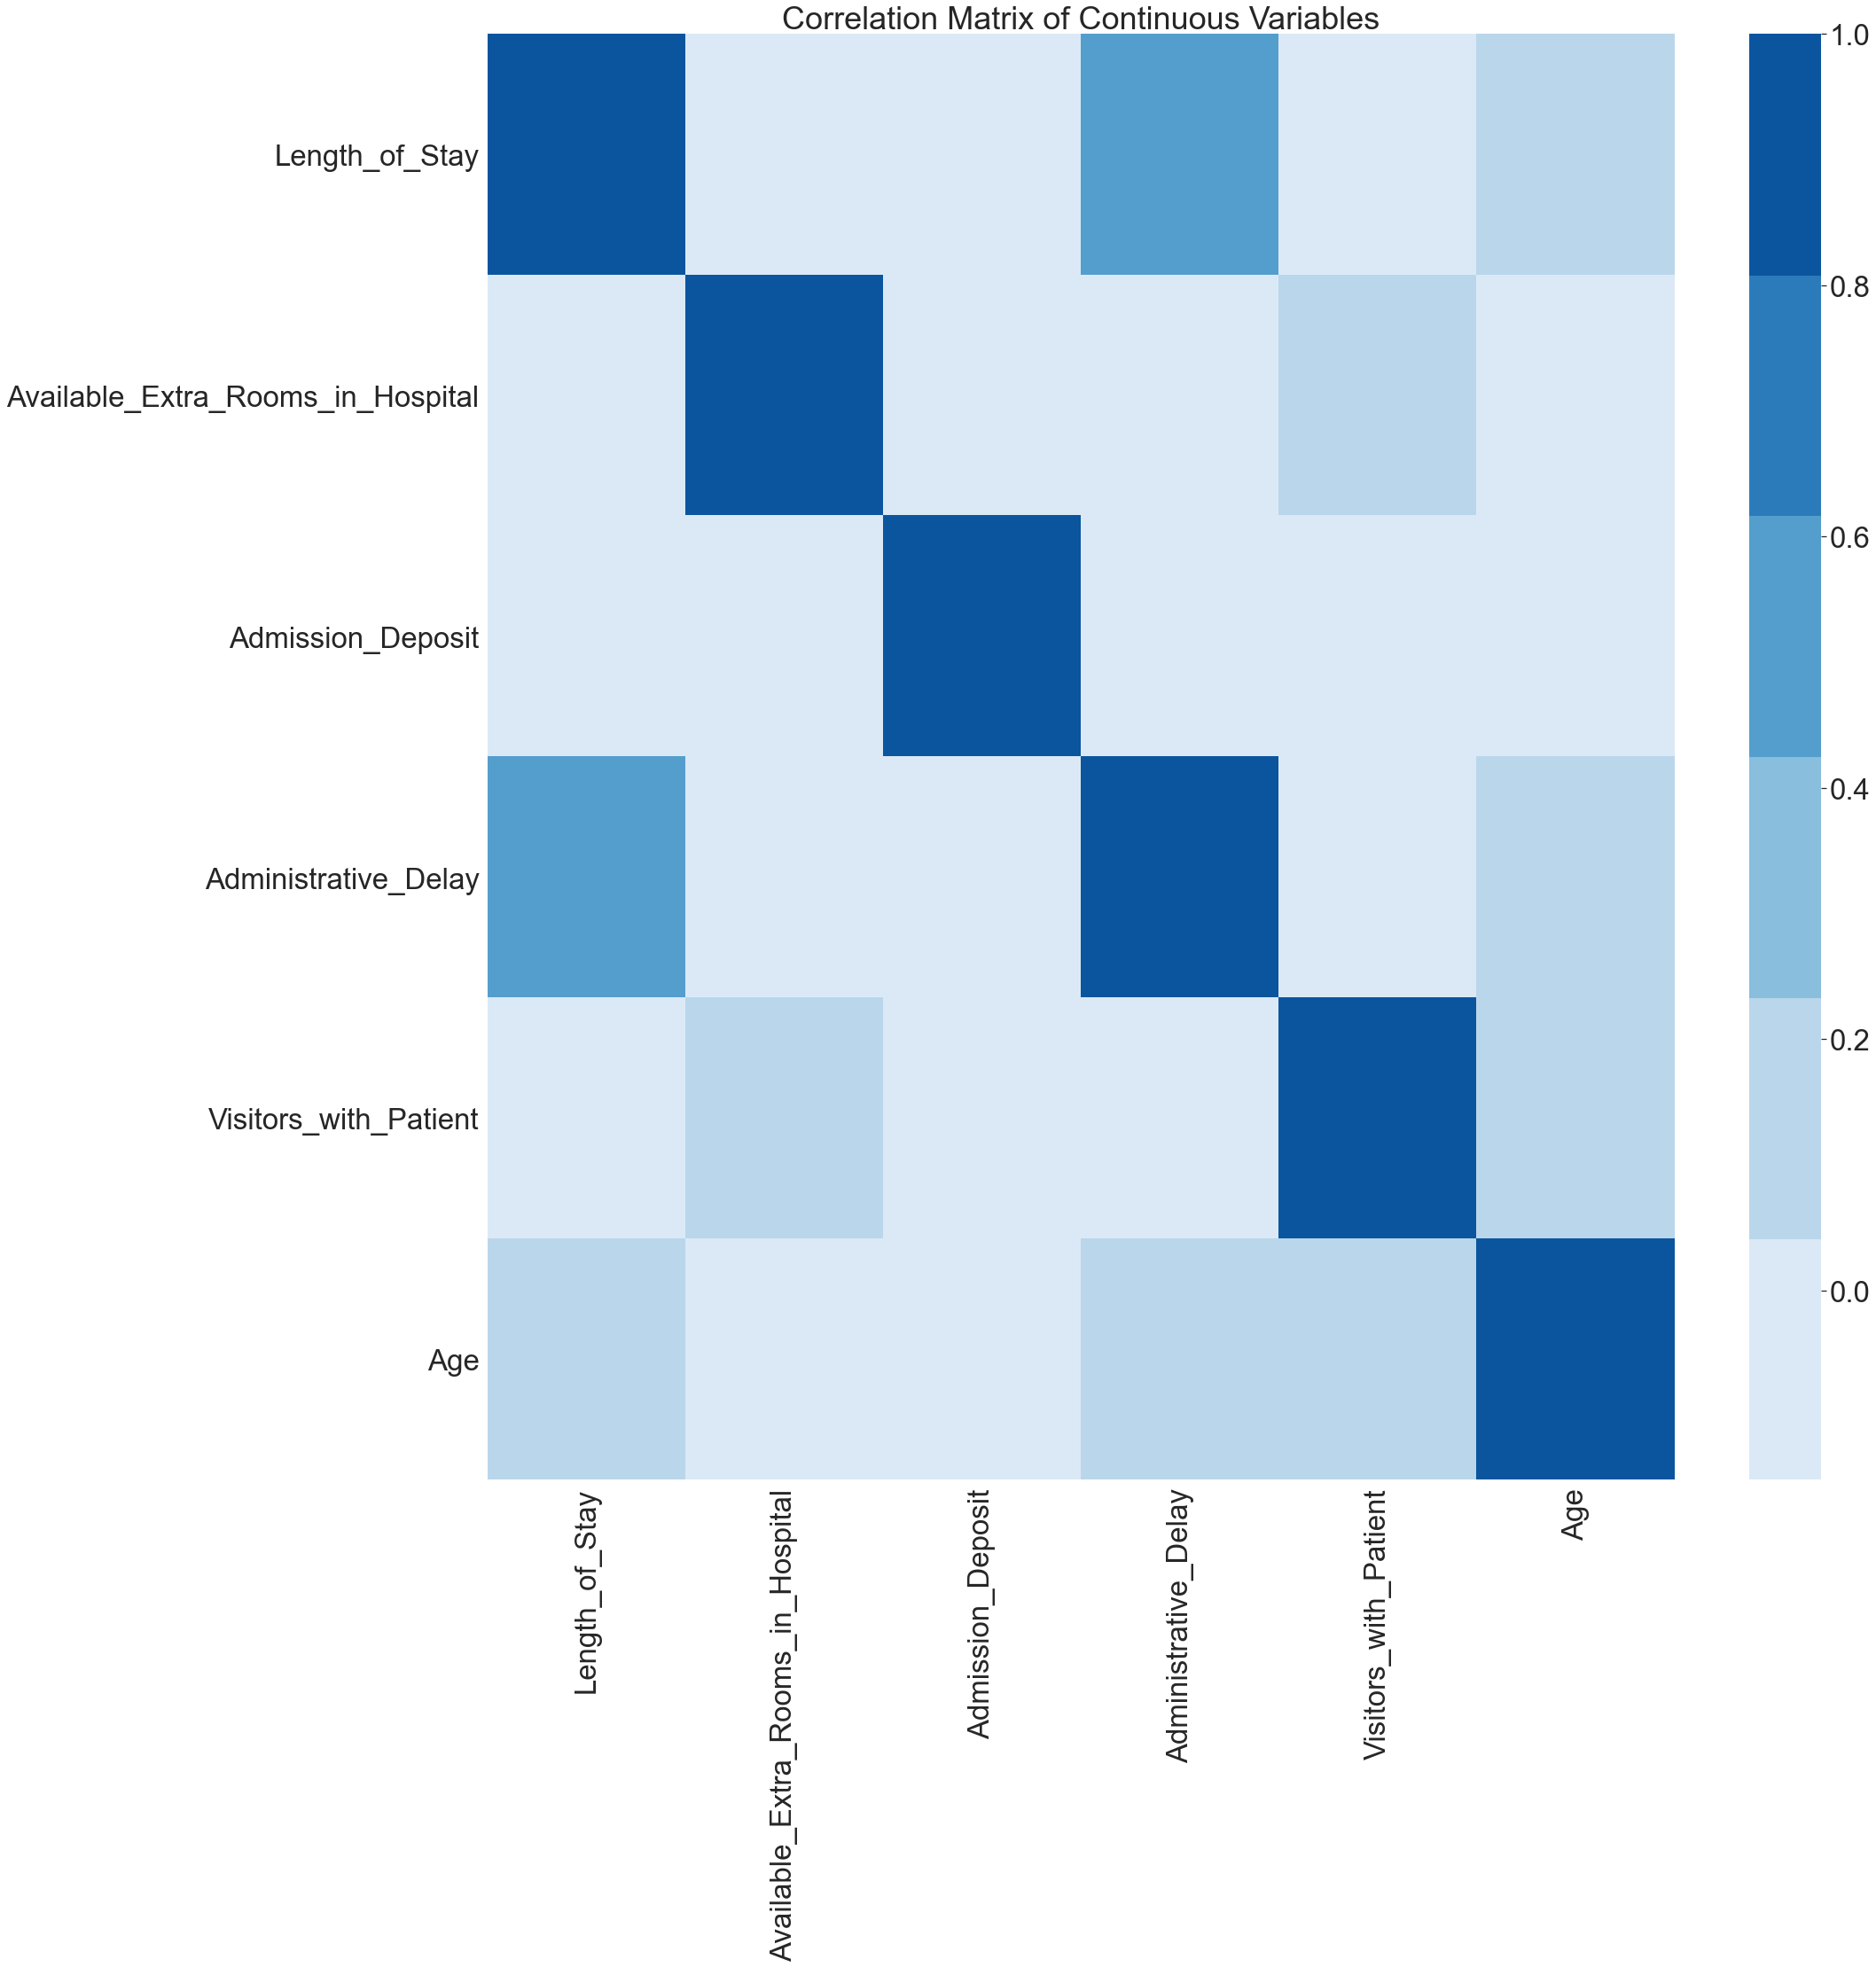

In [50]:
# plot the heatmap
sns.set(font_scale=3)  
fig, ax = plt.subplots(figsize=(30,30))
colormap = sns.color_palette("Blues")

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=colormap).set(title='Correlation Matrix of Continuous Variables')

In [234]:
# Correlation map, hover to zoom
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Length_of_Stay,Available_Extra_Rooms_in_Hospital,Admission_Deposit,Administrative_Delay,Visitors_with_Patient,Age
Length_of_Stay,1.00,-0.01,-0.03,0.46,0.02,0.05
Available_Extra_Rooms_in_Hospital,-0.01,1.00,-0.14,-0.00,0.10,-0.13
Admission_Deposit,-0.03,-0.14,1.00,-0.03,-0.15,0.03
Administrative_Delay,0.46,-0.00,-0.03,1.00,0.02,0.06
Visitors_with_Patient,0.02,0.10,-0.15,0.02,1.00,0.07
Age,0.05,-0.13,0.03,0.06,0.07,1.00


# Section 6: Comparison of Models

# Section 6.2: MARS Model

Steps of installation: Must use pyearth

In [52]:
marsResults = pd.DataFrame(columns = ['Model','RMSE','Normalised RMSE'])

## MARS Degree 1

In [53]:
#Fit an Earth model
random.seed(2022)
mars1 = Earth(feature_importance_type='gcv')
mars1.fit(X_train,Y_train)

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Earth(feature_importance_type='gcv')

In [54]:
#Print the model
print(mars1.trace())
print(mars1.summary())

Forward Pass
-------------------------------------------------------------------
iter  parent  var  knot  mse         terms  gcv      rsq    grsq   
-------------------------------------------------------------------
0     -       -    -     239.039047  1      239.041  0.000  0.000  
1     0       2    -1    188.359730  2      188.365  0.212  0.212  
2     0       5    -1    180.139994  3      180.149  0.246  0.246  
3     0       22   -1    179.172062  4      179.185  0.250  0.250  
4     0       6    -1    177.825704  5      177.842  0.256  0.256  
5     0       31   -1    176.939706  6      176.960  0.260  0.260  
6     0       23   -1    176.127599  7      176.151  0.263  0.263  
7     0       30   -1    175.832337  8      175.860  0.264  0.264  
8     0       16   -1    175.593656  9      175.625  0.265  0.265  
-------------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
---------------------------------------

In [55]:
# Train RMSE
rmse_mars1 = np.sqrt(mars1.mse_)
#rmse_log_mars

rmse_normalised_mars1 = rmse_mars1/(Y_train.max()-Y_train.min())*100
rmse_normalised_mars1

7.402891422939308

In [56]:
#Test mars1
start_time = time.time()
Y_prediction1 = mars1.predict(X_test)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.03311896324157715 seconds


In [57]:
# RMSE error and normalised
rmse_mars1_prediction = np.sqrt(metrics.mean_squared_error(Y_test, Y_prediction1))
print('RMSE: ', rmse_mars1_prediction)

# Normalised RMSE
rmse_normalised_mars1_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_prediction1)) / (max(Y_test) - min(Y_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars1_test)

marsResults = marsResults.append({'Model': 'MARS Degree 1', 'RMSE': rmse_mars1_prediction, 'Normalised RMSE': rmse_normalised_mars1_test}, ignore_index = True)

RMSE:  13.396317575020314
Normalised RMSE:  7.48397629889403


## MARS Degree 2

In [58]:
#Fit an Earth model
random.seed(2022)
mars2 = Earth(feature_importance_type='gcv', max_degree=2)
mars2.fit(X_train,Y_train)

#Print the model
print(mars2.trace())
print(mars2.summary())

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Forward Pass
-------------------------------------------------------------------
iter  parent  var  knot  mse         terms  gcv      rsq    grsq   
-------------------------------------------------------------------
0     -       -    -     239.039047  1      239.041  0.000  0.000  
1     0       2    -1    188.359730  2      188.365  0.212  0.212  
2     1       2    -1    174.302251  3      174.311  0.271  0.271  
3     1       5    -1    167.208300  4      167.220  0.300  0.300  
4     0       5    -1    163.115370  5      163.130  0.318  0.318  
5     4       31   -1    162.237113  6      162.255  0.321  0.321  
6     4       22   -1    161.215437  7      161.237  0.326  0.325  
7     1       16   -1    160.680669  8      160.706  0.328  0.328  
8     4       16   -1    156.708452  9      156.736  0.344  0.344  
9     4       5    -1    155.058079  10     155.089  0.351  0.351  
10    0       16   -1    153.795453  11     153.829  0.357  0.356  
11    10      6    -1    152.631166

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [59]:
rmse_mars2 = np.sqrt(mars2.mse_)
#rmse_log_mars

rmse_normalised_mars2 = rmse_mars2/(Y_train.max()-Y_train.min())*100
rmse_normalised_mars2

6.816521249666428

In [60]:
# Prediction
start_time = time.time()
Y_prediction2 = mars2.predict(X_test)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.03992199897766113 seconds


In [61]:
#Test erros Mars2
rmse_mars2_prediction = np.sqrt(metrics.mean_squared_error(Y_test, Y_prediction2))
print('RMSE: ', rmse_mars2_prediction)

# Normalised RMSE
rmse_normalised_mars2_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_prediction2)) / (max(Y_test) - min(Y_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars2_test)

marsResults = marsResults.append({'Model': 'MARS Degree 2', 'RMSE': rmse_mars2_prediction, 'Normalised RMSE': rmse_normalised_mars2_test}, ignore_index = True)

RMSE:  12.309775004794508
Normalised RMSE:  6.876969276421513


In [62]:
marsResults

,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969


## MARS Degree 1 (Log Dataset)

In [63]:
#Fit an Earth model
random.seed(2022)
log_mars1 = Earth(feature_importance_type='gcv', max_degree = 1)
log_mars1.fit(log_X_train,log_Y_train)

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Earth(feature_importance_type='gcv', max_degree=1)

In [64]:
#Print the model
print(log_mars1.trace())
print(log_mars1.summary())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.729567  1      0.730  0.000  0.000  
1     0       2    -1    0.398597  2      0.399  0.454  0.454  
2     0       5    -1    0.370130  3      0.370  0.493  0.493  
3     0       16   -1    0.354120  4      0.354  0.515  0.515  
4     0       31   -1    0.347013  5      0.347  0.524  0.524  
5     0       6    -1    0.345062  6      0.345  0.527  0.527  
6     0       22   -1    0.342279  7      0.342  0.531  0.531  
7     0       23   -1    0.341652  8      0.342  0.532  0.532  
---------------------------------------------------------------
Stopping Condition 2: Improvement below threshold

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   8      0.3

In [65]:
rmse_log_mars1 = np.sqrt(log_mars1.mse_)
#rmse_log_mars
rmse_normalised_log_mars1 = rmse_log_mars1/(log_Y_train.max()-log_Y_train.min())*100
rmse_normalised_log_mars1

12.97369588936747

In [66]:
# Predictions on test
start_time = time.time()
log_Y_prediction1 = log_mars1.predict(log_X_test)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.04447793960571289 seconds


In [67]:
# Test set errors
rmse_log_Y_mars_prediction1 = np.sqrt(metrics.mean_squared_error(log_Y_test, log_Y_prediction1))
print('RMSE: ', rmse_log_Y_mars_prediction1)

# Normalised RMSE
rmse_normalised_log_mars_test = np.sqrt(metrics.mean_squared_error(log_Y_test, log_Y_prediction1)) / (max(log_Y_test) - min(log_Y_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars_test)

marsResults = marsResults.append({'Model': 'Log MARS Degree 1', 'RMSE': rmse_log_Y_mars_prediction1, 'Normalised RMSE': rmse_normalised_log_mars_test}, ignore_index = True)
marsResults

RMSE:  0.5820102033843154
Normalised RMSE:  12.918202196731254


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202


## MARS Degree 2 (Log Dataset)

In [68]:
#Fit an Earth model
random.seed(2022)
log_mars2 = Earth(feature_importance_type='gcv', max_degree = 2)
log_mars2.fit(log_X_train,log_Y_train)

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Earth(feature_importance_type='gcv', max_degree=2)

In [69]:
#Print the model
print(log_mars2.trace())
print(log_mars2.summary())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.729567  1      0.730  0.000  0.000  
1     0       2    -1    0.398597  2      0.399  0.454  0.454  
2     1       5    -1    0.363960  3      0.364  0.501  0.501  
3     0       5    -1    0.336537  4      0.337  0.539  0.539  
4     0       16   -1    0.321842  5      0.322  0.559  0.559  
5     1       2    -1    0.310821  6      0.311  0.574  0.574  
6     3       16   -1    0.301825  7      0.302  0.586  0.586  
7     1       16   -1    0.296449  8      0.296  0.594  0.594  
8     0       31   -1    0.290972  9      0.291  0.601  0.601  
9     4       6    -1    0.289808  10     0.290  0.603  0.603  
10    0       6    -1    0.281615  11     0.282  0.614  0.614  
11    10      29   -1    0.280619  12     0.281  0.615  0.615  
12    1       22   -1    0.

In [70]:
# Predictions on test
start_time = time.time()
rmse_log_mars2 = np.sqrt(log_mars2.mse_)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.00033593177795410156 seconds


In [71]:
#rmse_log_mars
rmse_normalised_log_mars2 = rmse_log_mars2/(log_Y_train.max()-log_Y_train.min())*100
rmse_normalised_log_mars2

# Run on test
log_Y_prediction2 = log_mars2.predict(log_X_test)

rmse_log_Y_mars_prediction2 = np.sqrt(metrics.mean_squared_error(log_Y_test, log_Y_prediction2))
print('RMSE: ', rmse_log_Y_mars_prediction2)

# Normalised RMSE
rmse_normalised_log_mars_test2 = np.sqrt(metrics.mean_squared_error(log_Y_test, log_Y_prediction2)) / (max(log_Y_test) - min(log_Y_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars_test2)

marsResults = marsResults.append({'Model': 'Log MARS Degree 2', 'RMSE': rmse_log_Y_mars_prediction2, 'Normalised RMSE': rmse_normalised_log_mars_test2}, ignore_index = True)
marsResults

RMSE:  0.5252140080267542
Normalised RMSE:  11.657563239943858


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563


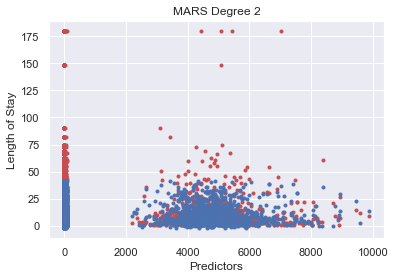

In [72]:
#Plot the model (NON-LOG)

sns.set(font_scale=1)  
pyplot.figure()
pyplot.plot(X_test[0:1000],Y_test[0:1000],'r.')
pyplot.plot(X_test[0:1000],Y_prediction2[0:1000],'b.')
pyplot.xlabel('Predictors')
pyplot.ylabel('Length of Stay')
pyplot.title('MARS Degree 2')
pyplot.show()

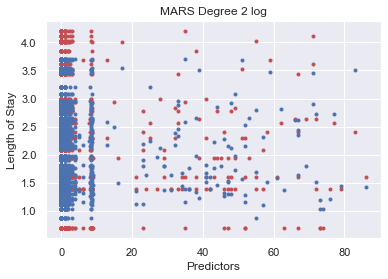

In [73]:
#Plot the model

  
pyplot.figure()
pyplot.plot(log_X_test[0:100],log_Y_test[0:100],'r.')
pyplot.plot(log_X_test[0:100], log_Y_prediction2[0:100],'b.')
pyplot.xlabel('Predictors')
pyplot.ylabel('Length of Stay')
pyplot.title('MARS Degree 2 log')
pyplot.show()

## Variable importance for MARS on degree 2

In [74]:
mars2.summary()

'Earth Model\n-------------------------------------------------------------------------------------\nBasis Function                                                  Pruned  Coefficient  \n-------------------------------------------------------------------------------------\n(Intercept)                                                     No      288.922      \nAdministrative_Delay                                            No      -271.061     \nAdministrative_Delay*Administrative_Delay                       No      63.7315      \nSeverity_of_Illness*Administrative_Delay                        No      9.45217      \nSeverity_of_Illness                                             No      -20.4108     \nPatient_Disposition_Skilled Nursing Home*Severity_of_Illness    No      2.04776      \nPayment_Typology_1_Medicaid*Severity_of_Illness                 No      1.2557       \nAPR_Medical_Surgical_Description_Medical*Administrative_Delay   No      36.9541      \nAPR_Medical_Surgical_Descript

In [75]:
varImpt = mars2.summary_feature_importances(sort_by='gcv')
varImpt = varImpt.splitlines()

# varImpt = pd.DataFrame(varImpt)
varImpt

['                                                     gcv',
 'Administrative_Delay                                 0.66   ',
 'APR_Medical_Surgical_Description_Medical             0.15   ',
 'APR_Risk_of_Mortality                                0.12   ',
 'Severity_of_Illness                                  0.05   ',
 'Patient_Disposition_Skilled Nursing Home             0.01   ',
 'Payment_Typology_1_Medicare                          0.01   ',
 'Patient_Disposition_Home or Self Care                0.00   ',
 'Payment_Typology_1_Medicaid                          0.00   ',
 'Age                                                  0.00   ',
 'Ward_Type_S                                          0.00   ',
 'Visitors_with_Patient                                0.00   ',
 'Type_of_Admission_Emergency                          0.00   ',
 'Type_of_Admission_Trauma                             0.00   ',
 'Type_of_Admission_Urgent                             0.00   ',
 'Ward_Type_P                

# Section 6.3: CART

## CART Finding Optimal Parameters

In [76]:
# Training without pruning
model1 = DecisionTreeRegressor(random_state=0)
model1.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [77]:
# Preediction on test set
start_time = time.time()
predicted = model1.predict(X_test)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.07697200775146484 seconds


In [78]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:',  Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (238828, 32)
Training Labels Shape: (238828,)
Testing Features Shape: (79610, 32)
Testing Labels Shape: (79610,)


In [79]:
X_tr = X_train.values #transform data frame to array 
X_tra= X_tr.reshape((X_train.shape[0],-1)) #reshape array so that [[]] are used

y_ar = Y_train.values #transform data frame to array 

In [80]:
# Testing out pruning
parameters = {'max_depth':range(3,20)}
regressor1 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor1.fit(X=X_tra, y=y_ar)
tree_model = regressor1.best_estimator_
print (regressor1.best_score_, regressor1.best_params_)

0.398981144484057 {'max_depth': 7}


## CART Optimal Model (Original dataset)

In [81]:
#Optimal Pruning
clf_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor1.best_params_['max_depth'])
clf_reg = clf_pruned.fit(X_train, Y_train)

In [82]:
# Prediction
start_time = time.time()
clf_predict = clf_reg.predict(X_train)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.04991316795349121 seconds


In [83]:
#Train RMSE
rmse_c1_train = np.sqrt(metrics.mean_squared_error(Y_train, clf_predict))
norm_rmse_c1_train = rmse_c1_train/(max(Y_train)-min(Y_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(rmse_c1_train,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_c1_train,3)) + "%\n")

#Test RMSE
clf_predict_test = clf_reg.predict(X_test)
rmse_c1_test = np.sqrt(metrics.mean_squared_error(Y_test, clf_predict_test))
norm_rmse_c1_test = rmse_c1_test/(max(Y_test)-min(Y_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(rmse_c1_test,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_c1_test,3)) + "%")

Train Set Errors
Root Mean Squared Error: 11.82817
Normalized Root Mean Squared Error: 6.608%

Test Set Errors
Root Mean Squared Error: 12.12861
Normalized Root Mean Squared Error: 6.776%


In [84]:
#clf_reg.feature_importances_
feat_imp_dict = dict(zip(X_train.columns, clf_reg.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head(10)

,Feature_Importance
Administrative_Delay,0.668621
Severity_of_Illness,0.119980
APR_Medical_Surgical_Description_Surgical,0.104354
APR_Risk_of_Mortality,0.041229
APR_Medical_Surgical_Description_Medical,0.016504
Patient_Disposition_Home or Self Care,0.010561
Patient_Disposition_Skilled Nursing Home,0.008066
Payment_Typology_1_Medicare,0.007202
Patient_Disposition_Home w/ Home Health Services,0.006695
Payment_Typology_1_Medicaid,0.006291


## CART Optimal Model (Log dataset)

In [85]:
# Training with pruning
model2 = DecisionTreeRegressor(random_state=0)
model2.fit(log_X_train, log_Y_train)

DecisionTreeRegressor(random_state=0)

In [86]:
# Prediction on test
start_time = time.time()
predicted2 = model2.predict(log_X_test)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.08061385154724121 seconds


In [87]:
X_tr_log = log_X_train.values #transform data frame to array 
X_tra_log=X_tr_log.reshape((log_X_train.shape[0],-1)) #reshape array so that [[]] are used

y_ar_log = log_Y_train.values #transform data frame to array 

In [88]:
# Hyperparameter tuning to find out prune depth
parameters = {'max_depth':range(3,20)}
regressor2 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor2.fit(X=X_tra_log, y=y_ar_log)
tree_model = regressor2.best_estimator_
print (regressor2.best_score_, regressor2.best_params_)

0.6294265601263692 {'max_depth': 9}


In [89]:
#Optimal Pruning
clf_pruned_log = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor2.best_params_['max_depth'])
clf_reg_log = clf_pruned_log.fit(log_X_train, log_Y_train)

In [90]:
start_time = time.time()
clf_predict2 = clf_reg_log.predict(X_train)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 0.05405902862548828 seconds


In [91]:
#Train RMSE
rmse_c2_train = np.sqrt(metrics.mean_squared_error(log_Y_train, clf_predict2))
norm_rmse_c2_train = rmse_c2_train/(max(log_Y_train)-min(log_Y_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:', round(rmse_c2_train,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_c2_train,3)) + "%\n")

#Test RMSE - rmse as a percentage
clf_predict_test2 = clf_reg_log.predict(X_test)
rmse_c2_test = np.sqrt(metrics.mean_squared_error(log_Y_test, clf_predict_test2))
norm_rmse_c2_test = rmse_c2_test/(max(log_Y_test)-min(log_Y_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(rmse_c2_test,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_c2_test,3)) + "%")

Train Set Errors
Root Mean Squared Error: 0.55191
Normalized Root Mean Squared Error: 12.25%

Test Set Errors
Root Mean Squared Error: 0.55157
Normalized Root Mean Squared Error: 12.243%


# Section 6.4: Random Forest

## Random Forest Testing between log and non log

In [92]:
# Instantiate model with 500 decision trees
rf = RandomForestRegressor(n_estimators = 2000, max_samples = 2500, max_features = 20, random_state = 2022)

# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestRegressor(max_features=20, max_samples=2500, n_estimators=2000,
                      random_state=2022)

In [93]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [94]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R-Squared Error:'), r2_score(Y_test, predictions)

Mean Absolute Error: 5.257595955281999
Mean Squared Error: 147.60045509090565
Root Mean Squared Error: 12.14909276822371
R-Squared Error:


(None, 0.3923351342843252)

In [95]:
# Normalised RMSE
np.sqrt(metrics.mean_squared_error(Y_test, predictions)) / (max(Y_test) - min(Y_test)) * 100

6.787202663812128

In [96]:
# Running for log
# Instantiate model with 500 decision trees
rf_log = RandomForestRegressor(n_estimators = 2000, max_samples = 2500, max_features = 20, random_state = 2022)

# Train the model on training data
rf_log.fit(log_X_train, log_Y_train)

RandomForestRegressor(max_features=20, max_samples=2500, n_estimators=2000,
                      random_state=2022)

In [97]:
# Use the forest's predict method on the test data, log
predictions_log = rf_log.predict(log_X_test)

In [98]:
# Checking of test_set, log errors
print('Mean Absolute Error:', metrics.mean_absolute_error(log_Y_test, predictions_log))  
print('Mean Squared Error:', metrics.mean_squared_error(log_Y_test, predictions_log))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_test, predictions_log)))

Mean Absolute Error: 0.3845568867410254
Mean Squared Error: 0.2629884758150258
Root Mean Squared Error: 0.5128240203179116


In [99]:
# Normalised RMSE
np.sqrt(metrics.mean_squared_error(log_Y_test, predictions_log)) / (max(log_Y_test) - min(log_Y_test)) * 100

11.382557122341218

## Random Forest Finding Optimal Parameters

In [46]:
%%time
param_grid = [
    # combinations of hyperparameters
    {'n_estimators': [500, 1000, 1500, 2000, 2500], 
     'max_features': [10, 15, 20, 30], 
     'max_samples': [500,1000,2000,3000]
     }, 
  ]

rf = RandomForestRegressor(random_state = 2022)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_RandomForest = GridSearchCV(rf, param_grid, cv=10, # 5
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search_RandomForest.fit(X_train, Y_train)

Wall time: 12h 57min 39s


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2022),
             param_grid=[{'max_features': [10, 15, 20, 30],
                          'max_samples': [500, 1000, 2000, 3000],
                          'n_estimators': [500, 1000, 1500, 2000, 2500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search_RandomForest.best_params_

{'max_features': 10, 'max_samples': 3000, 'n_estimators': 2500}

In [48]:
grid_search_RandomForest.best_estimator_

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [49]:
cvres = grid_search_RandomForest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

12.181347318078746 {'max_features': 10, 'max_samples': 500, 'n_estimators': 500}
12.179677190041271 {'max_features': 10, 'max_samples': 500, 'n_estimators': 1000}
12.179036675451517 {'max_features': 10, 'max_samples': 500, 'n_estimators': 1500}
12.176960963309135 {'max_features': 10, 'max_samples': 500, 'n_estimators': 2000}
12.177580961371872 {'max_features': 10, 'max_samples': 500, 'n_estimators': 2500}
12.070266357350768 {'max_features': 10, 'max_samples': 1000, 'n_estimators': 500}
12.060618360449569 {'max_features': 10, 'max_samples': 1000, 'n_estimators': 1000}
12.05863071164728 {'max_features': 10, 'max_samples': 1000, 'n_estimators': 1500}
12.057479934225919 {'max_features': 10, 'max_samples': 1000, 'n_estimators': 2000}
12.057374374079426 {'max_features': 10, 'max_samples': 1000, 'n_estimators': 2500}
11.986423212029276 {'max_features': 10, 'max_samples': 2000, 'n_estimators': 500}
11.978203895436554 {'max_features': 10, 'max_samples': 2000, 'n_estimators': 1000}
11.9763919575

In [50]:
grid_Search_results = pd.DataFrame(grid_search_RandomForest.cv_results_)

In [51]:
grid_Search_results.to_csv(f'{path}/gridSearchResults.csv')

In [52]:
# Using tuned Random Forest model to fit and test
final_model_RandomForest = grid_search_RandomForest.best_estimator_
#final_model_RandomForest = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)
#final_model_RandomForest.fit(X_train, Y_train)

##  Random Forest using Original Dataset

In [100]:
# Optional: to run the optimal RF Model
final_model_RandomForest = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)
final_model_RandomForest.fit(X_train, Y_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [101]:
start_time = time.time()
final_test_RandomForest_pred = final_model_RandomForest.predict(X_test) #(test set)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 35.6861047744751 seconds


In [102]:
# Checking of test_set, log errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, final_test_RandomForest_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, final_test_RandomForest_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, final_test_RandomForest_pred)))

Mean Absolute Error: 5.18493756563246
Mean Squared Error: 146.27644788638818
Root Mean Squared Error: 12.094480058538613


In [103]:
# Normalised RMSE
np.sqrt(metrics.mean_squared_error(Y_test, final_test_RandomForest_pred)) / (max(Y_test) - min(Y_test)) * 100

6.756692770133303

##  Random Forest using Log Dataset

In [104]:
# For log variables, view if trend same (log is worst)
# Running for log
# Instantiate model with 500 decision trees
rf_log = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_log.fit(log_X_train, log_Y_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [105]:
# Use the forest's predict method on the test data, log
start_time = time.time()
predictions_log = rf_log.predict(log_X_test)
print("Time for prediction: %s seconds" % (time.time() - start_time))

Time for prediction: 39.244492053985596 seconds


In [106]:
# Checking of test_set, log errors
print('Mean Absolute Error:', metrics.mean_absolute_error(log_Y_test, predictions_log))  
print('Mean Squared Error:', metrics.mean_squared_error(log_Y_test, predictions_log))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_test, predictions_log)))

Mean Absolute Error: 0.3844283206694972
Mean Squared Error: 0.2627345220056909
Root Mean Squared Error: 0.5125763572441582


In [107]:
# Normalised RMSE
np.sqrt(metrics.mean_squared_error(log_Y_test, predictions_log)) / (max(log_Y_test) - min(log_Y_test)) * 100

11.377060033725233

## Random Forest Variable Importance

In [108]:
# Instantiate model with 2500 decision trees
final_model_RandomForest = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
final_model_RandomForest.fit(X_train, Y_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

<BarContainer object of 15 artists>

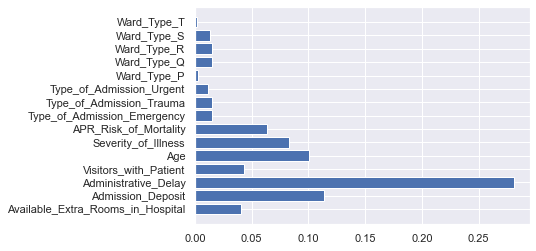

In [109]:
# Basic but inaccurate
final_model_RandomForest.feature_importances_
plt.barh(X_train.columns[0:15], final_model_RandomForest.feature_importances_[0:15])

In [110]:
final_model_RandomForest.feature_importances_

array([4.02839546e-02, 1.13992201e-01, 2.81012880e-01, 4.32471789e-02,
       1.00172560e-01, 8.33130802e-02, 6.38274278e-02, 1.48947072e-02,
       1.52939611e-02, 1.15575041e-02, 3.01522610e-03, 1.46180425e-02,
       1.51972276e-02, 1.32816176e-02, 1.67576184e-03, 2.71012357e-05,
       2.80767108e-02, 2.82883796e-02, 9.22119207e-03, 2.15041275e-03,
       1.30903256e-03, 1.03514798e-03, 1.86547141e-02, 1.49788342e-02,
       4.46056260e-03, 9.59805650e-03, 3.09473918e-03, 1.26307122e-03,
       2.07657551e-02, 1.05358227e-02, 1.45604926e-02, 1.65966439e-02])

Text(0.5, 0, 'Random Forest Feature Importance')

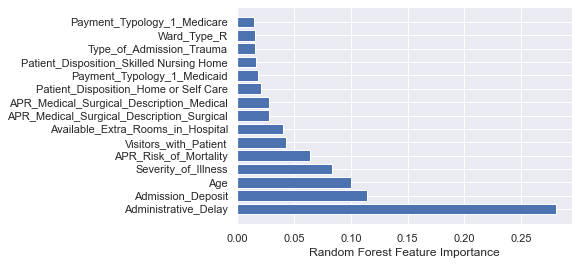

In [111]:
sorted_idx = (-final_model_RandomForest.feature_importances_).argsort()
plt.barh(X_train.columns[sorted_idx][0:15], final_model_RandomForest.feature_importances_[sorted_idx][0:15])
plt.xlabel("Random Forest Feature Importance")

# Section 7: Model Evaluation

## Section 7.1: Predictive Accuracy - Overprediction / Underprediction

## Prediction Type for MARS

In [125]:
over_mars = 0
under_mars = 0
equal_mars = 0

#Using Best MARS model
for i in range(len(Y_test)):
    if Y_prediction2[i] > Y_test.tolist()[i]:
        over_mars += 1
    elif Y_prediction2[i] < Y_test.tolist()[i]:
        under_mars += 1
    else:
        equal_mars += 1

In [217]:
print("Over:", str(round(over_mars / (over_mars + under_mars + equal_mars)*100,3)) + "%", "(" + str(over_mars) + ")")
print("Under:", str(round(under_mars / (over_mars + under_mars + equal_mars)*100,3)) + "%", "(" + str(under_mars) + ")")
print("Equal:", str(round(equal_mars / (over_mars + under_mars + equal_mars)*100,3)) + "%", "(" + str(equal_mars) + ")")

Over: 55.536% (44212)
Under: 44.464% (35398)
Equal: 0.0% (0)


## Prediction Type for CART

In [127]:
over_cart = 0
under_cart = 0
equal_cart = 0

#Using Best CART model
for i in range(len(Y_test)):
    if clf_predict_test[i] > Y_test.tolist()[i]:
        over_cart += 1
    elif clf_predict_test[i] < Y_test.tolist()[i]:
        under_cart += 1
    else:
        equal_cart += 1

In [218]:
print("Over:", str(round(over_cart / (over_cart + under_cart + equal_cart)*100,3)) + "%", "(" + str(over_cart) + ")")
print("Under:", str(round(under_cart / (over_cart + under_cart + equal_cart)*100,3)) + "%", "(" + str(under_cart) + ")")
print("Equal:", str(round(equal_cart / (over_cart + under_cart + equal_cart)*100,3)) + "%", "(" + str(equal_cart) + ")")

Over: 59.112% (47059)
Under: 40.887% (32550)
Equal: 0.001% (1)


## Prediction Type for Random Forest

In [130]:
over_rf = 0
under_rf = 0
equal_rf = 0

#Using Best RF model
for i in range(len(Y_test)):
    if final_test_RandomForest_pred[i] > Y_test.tolist()[i]:
        over_rf += 1
    elif final_test_RandomForest_pred[i] < Y_test.tolist()[i]:
        under_rf += 1
    else:
        equal_rf += 1

In [219]:
print("Over:", str(round(over_rf / (over_rf + under_rf + equal_rf)*100,3)) + "%", "(" + str(over_rf) + ")")
print("Under:", str(round(under_rf / (over_rf + under_rf + equal_rf)*100,3)) + "%", "(" + str(under_rf) + ")")
print("Equal:", str(round(equal_rf / (over_rf + under_rf + equal_rf)*100,3)) + "%", "(" + str(equal_rf) + ")")

Over: 64.375% (51249)
Under: 35.615% (28353)
Equal: 0.01% (8)


# Section 8: Variable Importance Analysis

## Section 8.2: Variable Importance Administrative Variables - CART

In [227]:
#Optimal Pruning
clf_pruned_Admin = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor1.best_params_['max_depth'])
clf_reg_Admin = clf_pruned_Admin.fit(X_train_Admin, Y_train_Admin)

In [231]:
#Prediction
clf_predict_Admin = clf_reg_Admin.predict(X_test_Admin)

In [232]:
#Test RMSE
rmse_Admin = np.sqrt(metrics.mean_squared_error(Y_test_Admin, clf_predict_Admin))
norm_rmse_Admin = rmse_Admin/(max(Y_test_Admin)-min(Y_test_Admin))* 100
print('Root Mean Squared Error:',  round(rmse_Admin,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_Admin,3)) + "%")

Root Mean Squared Error: 13.26116
Normalized Root Mean Squared Error: 7.408%


In [233]:
#clf_reg.feature_importances_
feat_imp_dict_Admin = dict(zip(X_train_Admin.columns, clf_reg_Admin.feature_importances_))
feat_imp_Admin = pd.DataFrame.from_dict(feat_imp_dict_Admin, orient='index')
feat_imp_Admin.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp_Admin.sort_values(by=['Feature_Importance'], ascending=False)

,Feature_Importance
Administrative_Delay,0.974970
Admission_Deposit,0.012506
Age,0.007073
Visitors_with_Patient,0.003200
Ward_Type_Q,0.001252
Ward_Type_S,0.000511
Ward_Type_T,0.000282
Ward_Type_R,0.000131
Available_Extra_Rooms_in_Hospital,0.000076
Ward_Type_P,0.000000


## Variable Importance Administrative Variables - Random Forest

In [220]:
# Using best model params, max_features= (2 from the max), max_samples=3000, n_estimators=1500,
rf_Admin = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 11, random_state = 2022)

# Train the model on training data
rf_Admin.fit(X_train_Admin, Y_train_Admin)

RandomForestRegressor(max_features=11, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [221]:
# Use the forest's predict method on the test data
predictions_Admin = rf_Admin.predict(X_test_Admin)

In [222]:
# Checking of test_set errors for Admin
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_Admin, predictions_Admin))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_Admin, predictions_Admin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_Admin, predictions_Admin)))

Mean Absolute Error: 6.041544775781936
Mean Squared Error: 177.80758858013718
Root Mean Squared Error: 13.334451191561548


In [223]:
# Normalised RMSE
np.sqrt(metrics.mean_squared_error(Y_test_Admin, predictions_Admin)) / (max(Y_test_Admin) - min(Y_test_Admin)) * 100

7.449414073498072

## Random Forest Variable Importance

<BarContainer object of 11 artists>

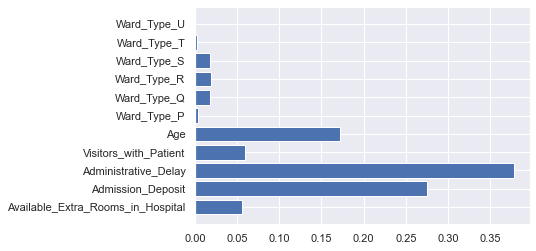

In [224]:
# Basic but inaccurate
rf_Admin.feature_importances_
plt.barh(X_train_Admin.columns, rf_Admin.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

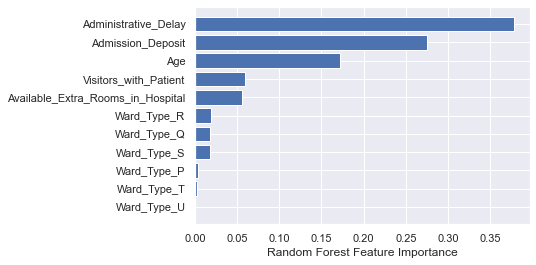

In [225]:
sorted_idx = rf_Admin.feature_importances_.argsort()
plt.barh(X_train_Admin.columns[sorted_idx], rf_Admin.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [100]:
# Using shap
explainer = shap.TreeExplainer(rf_Admin)
shap_values_Admin = explainer.shap_values(X_test_Admin)

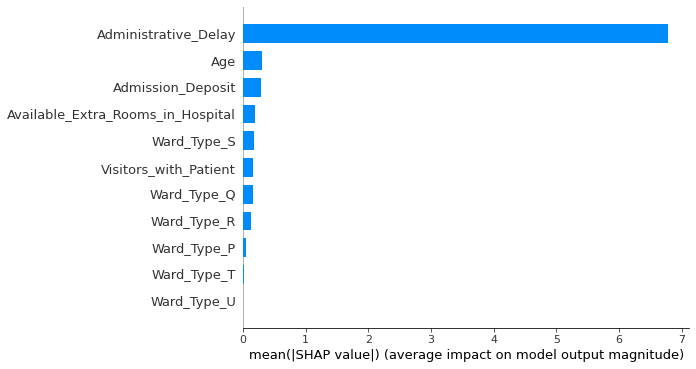

In [47]:
shap.summary_plot(shap_values_Admin, X_test_Admin, plot_type="bar")

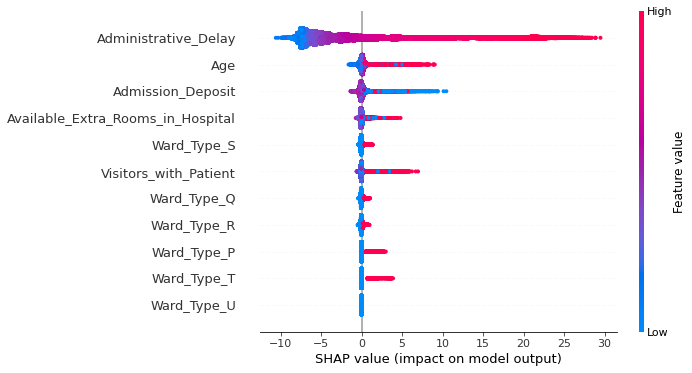

In [48]:
shap.summary_plot(shap_values_Admin, X_test_Admin)

In [53]:
shap_values_Admin

array([[-3.49422023e-02, -4.02332492e-02,  8.29039173e+00, ...,
         5.47090764e-01, -1.24353477e-02, -3.96802592e-04],
       [-3.88987503e-01, -1.87365020e-02,  1.40045881e+01, ...,
        -1.52789875e-01, -1.49795874e-02, -4.95674896e-04],
       [-9.86084697e-02, -5.22977589e-02, -6.13441634e+00, ...,
        -4.00577314e-02, -5.42801949e-03, -1.05734095e-04],
       ...,
       [ 2.99439322e-01,  4.91546661e+00,  1.90955217e+01, ...,
        -2.84240439e-01, -1.57939625e-02, -3.93568972e-04],
       [ 9.14947213e-03,  7.67473182e-01, -5.53234270e+00, ...,
         3.30110198e-01, -6.51221588e-03, -2.34945431e-04],
       [ 2.83481832e-03, -1.72324729e-01, -6.08783024e+00, ...,
        -4.42782262e-02, -5.62424771e-03, -1.24904474e-04]])

In [54]:
shap_values_Admin_data = pd.DataFrame(shap_values_Admin)
shap_values_Admin_data

,0,1,2,3,4,5,6,7,8,9,10
0,-0.034942,-0.040233,8.290392,-0.186974,0.293454,-0.034182,-0.218737,-0.004855,0.547091,-0.012435,-0.000397
1,-0.388988,-0.018737,14.004588,0.070391,-0.951767,-0.029539,0.633875,0.037424,-0.152790,-0.014980,-0.000496
2,-0.098608,-0.052298,-6.134416,-0.028479,0.071889,-0.011326,0.186402,-0.041790,-0.040058,-0.005428,-0.000106
3,-0.039673,0.085675,-6.145470,-0.029608,0.062364,-0.010472,0.142087,-0.054856,-0.058976,-0.005551,-0.000138
4,-0.086669,0.107584,-6.226117,0.003157,-0.076157,-0.010760,0.190343,-0.042667,-0.049259,-0.005538,-0.000135
...,...,...,...,...,...,...,...,...,...,...,...
79605,0.906931,-0.046601,-7.440009,0.352231,-0.079743,-0.007497,-0.062302,-0.054673,0.324830,-0.005280,-0.000105
79606,-0.011716,-0.027944,-6.742221,-0.018804,0.081473,-0.010760,0.133989,-0.052567,-0.060210,-0.005358,-0.000101
79607,0.299439,4.915467,19.095522,0.211175,2.161180,-0.033165,-0.317484,0.195678,-0.284240,-0.015794,-0.000394
79608,0.009149,0.767473,-5.532343,-0.035992,-0.163847,-0.012011,-0.061694,-0.073518,0.330110,-0.006512,-0.000235


In [55]:
shap_values_Admin_data.to_csv(f'{path}/shap_values_Admin_data_Results.csv')

In [56]:
perm_importance_Admin.importances_data = pd.DataFrame(perm_importance_Admin.importances)
perm_importance_Admin.importances_data

,0,1,2,3,4
0,-4.567188e-04,-3.949577e-04,-4.615896e-04,2.444978e-04,-6.465472e-04
1,-5.933655e-05,-8.416658e-04,9.283913e-04,-7.466245e-04,-3.340170e-04
2,6.004255e-01,6.027883e-01,6.047159e-01,5.990700e-01,6.024000e-01
3,1.124644e-03,6.132119e-04,1.252557e-03,9.148699e-04,8.036460e-04
4,7.848227e-04,1.201123e-03,1.076611e-03,1.538213e-03,5.919500e-04
5,3.839603e-05,-1.702242e-04,-1.386875e-05,-2.571912e-05,-8.649317e-05
6,5.180063e-04,7.328831e-04,6.052382e-04,4.393376e-04,4.673846e-04
7,1.085426e-03,4.540913e-04,7.504139e-04,7.715049e-04,1.058717e-03
8,1.291718e-03,1.275796e-03,9.833586e-04,1.211332e-03,1.042054e-03
9,-9.283167e-05,-1.562501e-04,-1.658452e-04,-6.601827e-06,-5.948416e-07


In [57]:
perm_importance_Admin.importances_data.to_csv(f'{path}/perm_importance_Admin.importances_data_Results.csv')

# Section 12: Limitations/Challenges

## Severity Split Analysis

## Split preparation

In [132]:
# One hot encode
fullData = pd.get_dummies(fullData, columns=['Type_of_Admission','Ward_Type', 'APR_Medical_Surgical_Description','Payment_Typology_1', 'Patient_Disposition'])

# Label encode
fullData['Severity_of_Illness'] = fullData['Severity_of_Illness'].apply(lambda x: ['Minor', 'Moderate', 'Extreme'].index(x))
fullData['APR_Risk_of_Mortality'] = fullData['APR_Risk_of_Mortality'].apply(lambda y: ['Minor', 'Moderate', 'Major','Extreme'].index(y))

In [133]:
Y = fullData['Length_of_Stay']
X = fullData.drop(["Length_of_Stay"] ,axis= 1)

In [134]:
fullData['Severity_of_Illness'].value_counts()

1    175843
0     85872
2     56723
Name: Severity_of_Illness, dtype: int64

## Extreme Severity

In [135]:
fullData = fullData.sort_values(by=['Severity_of_Illness'])

In [136]:
extremeData = fullData[:56723]
extremeData = extremeData.drop(["Severity_of_Illness"] ,axis= 1)

Y_ext = extremeData['Length_of_Stay']
X_ext = extremeData.drop(["Length_of_Stay"] ,axis= 1)
X_ext_train, X_ext_test, Y_ext_train, Y_ext_test = train_test_split(X_ext, Y_ext, test_size = 0.25, random_state = 2022)


print('Training Features Shape:', X_ext_train.shape)
print('Training Labels Shape:',  Y_ext_train.shape)
print('Testing Features Shape:', X_ext_test.shape)
print('Testing Labels Shape:', Y_ext_test.shape)

#Prepare log dataset
log_X_ext = X_ext.copy()

# Logging of variables
log_X_ext['Visitors_with_Patient'] = np.log(log_X_ext['Visitors_with_Patient'] + 1)
log_X_ext['Admission_Deposit'] = np.log(log_X_ext['Admission_Deposit'] + 1)

# Logging of Y
log_Y_ext = np.log(Y_ext+1)

log_X_ext_train, log_X_ext_test, log_Y_ext_train, log_Y_ext_test = train_test_split(log_X_ext, log_Y_ext, test_size = 0.25, random_state = 2022)

Training Features Shape: (42542, 31)
Training Labels Shape: (42542,)
Testing Features Shape: (14181, 31)
Testing Labels Shape: (14181,)


## Moderate Severity

In [137]:
moderateData = fullData[56723+85872:]
moderateData = moderateData.drop(["Severity_of_Illness"] ,axis= 1)
moderateData

,Length_of_Stay,Available_Extra_Rooms_in_Hospital,Admission_Deposit,Administrative_Delay,Visitors_with_Patient,Age,APR_Risk_of_Mortality,Type_of_Admission_Emergency,Type_of_Admission_Trauma,Type_of_Admission_Urgent,...,Payment_Typology_1_Medicaid,Payment_Typology_1_Medicare,Payment_Typology_1_Miscellaneous/Other,Payment_Typology_1_Private Health Insurance,Payment_Typology_1_Self-Pay,Payment_Typology_1_Unknown,Patient_Disposition_Home or Self Care,Patient_Disposition_Home w/ Home Health Services,Patient_Disposition_Others,Patient_Disposition_Skilled Nursing Home
239943,4,4.0,6399.0,2.07,2.0,45,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
239942,21,4.0,4338.0,2.47,2.0,46,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
239941,10,4.0,8204.0,2.24,2.0,42,2,0,1,0,...,0,1,0,0,0,0,0,1,0,0
239940,7,3.0,4027.0,2.17,3.0,92,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
239939,6,4.0,4373.0,2.18,4.0,94,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,22,2.0,5024.0,2.39,2.0,44,3,0,0,1,...,0,1,0,0,0,0,0,0,0,1
37810,4,2.0,4555.0,2.45,4.0,78,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
37809,37,2.0,4276.0,2.38,3.0,79,2,1,0,0,...,1,0,0,0,0,0,1,0,0,0
37820,9,2.0,5377.0,2.21,2.0,55,3,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [138]:
Y_mod = moderateData['Length_of_Stay']
X_mod = moderateData.drop(["Length_of_Stay"] ,axis= 1)
X_mod_train, X_mod_test, Y_mod_train, Y_mod_test = train_test_split(X_mod, Y_mod, test_size = 0.25, random_state = 2022)

print('Training Features Shape:', X_mod_train.shape)
print('Training Labels Shape:',  Y_mod_train.shape)
print('Testing Features Shape:', X_mod_test.shape)
print('Testing Labels Shape:', Y_mod_test.shape)

#Prepare log dataset
log_X_mod = X_mod.copy()

# Logging of variables
log_X_mod['Visitors_with_Patient'] = np.log(log_X_mod['Visitors_with_Patient'] + 1)
log_X_mod['Admission_Deposit'] = np.log(log_X_mod['Admission_Deposit'] + 1)

# Logging of Y
log_Y_mod = np.log(Y_mod+1)

log_X_mod_train, log_X_mod_test, log_Y_mod_train, log_Y_mod_test = train_test_split(log_X_mod, log_Y_mod, test_size = 0.25, random_state = 2022)

Training Features Shape: (131882, 31)
Training Labels Shape: (131882,)
Testing Features Shape: (43961, 31)
Testing Labels Shape: (43961,)


## Minor Severity

In [139]:
minorData = fullData[56723:56723+85872]
minorData = minorData.drop(["Severity_of_Illness"] ,axis= 1)

Y_min = minorData['Length_of_Stay']
X_min = minorData.drop(["Length_of_Stay"] ,axis= 1)
X_min_train, X_min_test, Y_min_train, Y_min_test = train_test_split(X_min, Y_min, test_size = 0.25, random_state = 2022)

print('Training Features Shape:', X_min_train.shape)
print('Training Labels Shape:',  Y_min_train.shape)
print('Testing Features Shape:', X_min_test.shape)
print('Testing Labels Shape:', Y_min_test.shape)

#Prepare log dataset
log_X_min = X_min.copy()

# Logging of variables
log_X_min['Visitors_with_Patient'] = np.log(log_X_min['Visitors_with_Patient'] + 1)
log_X_min['Admission_Deposit'] = np.log(log_X_min['Admission_Deposit'] + 1)

# Logging of Y
log_Y_min = np.log(Y_min+1)

log_X_min_train, log_X_min_test, log_Y_min_train, log_Y_min_test = train_test_split(log_X_min, log_Y_min, test_size = 0.25, random_state = 2022)

Training Features Shape: (64404, 31)
Training Labels Shape: (64404,)
Testing Features Shape: (21468, 31)
Testing Labels Shape: (21468,)


## MARS

### Extreme Severity

#### MARS Degree 1

In [140]:
random.seed(2022)
mars1_ext = Earth(feature_importance_type='gcv')
mars1_ext.fit(X_ext_train,Y_ext_train)
mars1_predict_ext = mars1_ext.predict(X_ext_test)


rmse_mars1_ext = np.sqrt(metrics.mean_squared_error(Y_ext_test, mars1_predict_ext))
print('RMSE: ', rmse_mars1_ext)

# Normalised RMSE
rmse_normalised_mars1_ext = np.sqrt(metrics.mean_squared_error(Y_ext_test, mars1_predict_ext)) / (max(Y_ext_test) - min(Y_ext_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars1_ext)

marsResults = marsResults.append({'Model': 'MARS Degree 1 (Extreme)', 'RMSE': rmse_mars1_ext, 'Normalised RMSE': rmse_normalised_mars1_ext}, ignore_index = True)
marsResults

RMSE:  5.533991486823178
Normalised RMSE:  3.0916153557671384


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615


#### MARS Degree 2

In [141]:
random.seed(2022)
mars2_ext = Earth(feature_importance_type='gcv', max_degree=2)
mars2_ext.fit(X_ext_train,Y_ext_train)
mars2_predict_ext = mars2_ext.predict(X_ext_test)


rmse_mars2_ext = np.sqrt(metrics.mean_squared_error(Y_ext_test, mars2_predict_ext))
print('RMSE: ', rmse_mars2_ext)

# Normalised RMSE
rmse_normalised_mars2_ext = np.s7qrt(metrics.mean_squared_error(Y_ext_test, mars2_predict_ext)) / (max(Y_ext_test) - min(Y_ext_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars2_ext)

marsResults = marsResults.append({'Model': 'MARS Degree 2 (Extreme)', 'RMSE': rmse_mars2_ext, 'Normalised RMSE': rmse_normalised_mars2_ext}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  4.9590994984480545
Normalised RMSE:  2.770446647177684


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447


#### Log Mars Degree 1

In [201]:
random.seed(2022)
log_mars1_ext = Earth(feature_importance_type='gcv', max_degree=1)
log_mars1_ext.fit(log_X_ext_train,log_Y_ext_train)
log_mars1_predict_ext = log_mars1_ext.predict(log_X_ext_test)


rmse_log_mars1_ext = np.sqrt(metrics.mean_squared_error(log_Y_ext_test, log_mars1_predict_ext))
print('RMSE: ', rmse_mars1_ext)

# Normalised RMSE
rmse_normalised_log_mars1_ext = np.sqrt(metrics.mean_squared_error(log_Y_ext_test, log_mars1_predict_ext)) / (max(log_Y_ext_test) - min(log_Y_ext_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars1_ext)

marsResults = marsResults.append({'Model': 'Log MARS Degree 1 (Extreme)', 'RMSE': rmse_log_mars1_ext, 'Normalised RMSE': rmse_normalised_log_mars1_ext}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  5.533991486823178
Normalised RMSE:  10.994253361286288


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253


#### Logs MARS Degree 2

In [202]:
random.seed(2022)
log_mars2_ext = Earth(feature_importance_type='gcv', max_degree=2)
log_mars2_ext.fit(log_X_ext_train,log_Y_ext_train)
log_mars2_predict_ext = log_mars2_ext.predict(log_X_ext_test)


rmse_log_mars2_ext = np.sqrt(metrics.mean_squared_error(log_Y_ext_test, log_mars2_predict_ext))
print('RMSE: ', rmse_mars2_ext)

# Normalised RMSE
rmse_normalised_log_mars2_ext = np.sqrt(metrics.mean_squared_error(log_Y_ext_test, log_mars2_predict_ext)) / (max(log_Y_ext_test) - min(log_Y_ext_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars2_ext)

marsResults = marsResults.append({'Model': 'Log MARS Degree 2 (Extreme)', 'RMSE': rmse_log_mars2_ext, 'Normalised RMSE': rmse_normalised_log_mars2_ext}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  4.9590994984480545
Normalised RMSE:  10.283441921015427


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442


### Moderate Severity

#### MARS Degree 1

In [203]:
random.seed(2022)
mars1_mod = Earth(feature_importance_type='gcv')
mars1_mod.fit(X_mod_train,Y_mod_train)
mars1_predict_mod = mars1_mod.predict(X_mod_test)


rmse_mars1_mod = np.sqrt(metrics.mean_squared_error(Y_mod_test, mars1_predict_mod))
print('RMSE: ', rmse_mars1_mod)

# Normalised RMSE
rmse_normalised_mars1_mod = np.sqrt(metrics.mean_squared_error(Y_mod_test, mars1_predict_mod)) / (max(Y_mod_test) - min(Y_mod_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars1_mod)

marsResults = marsResults.append({'Model': 'MARS Degree 1 (Moderate)', 'RMSE': rmse_mars1_mod, 'Normalised RMSE': rmse_normalised_mars1_mod}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  16.32386867966768
Normalised RMSE:  9.119479709311552


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480


#### MARS Degree 2

In [204]:
random.seed(2022)
mars2_mod = Earth(feature_importance_type='gcv', max_degree=2)
mars2_mod.fit(X_mod_train,Y_mod_train)
mars2_predict_mod = mars2_mod.predict(X_mod_test)


rmse_mars2_mod = np.sqrt(metrics.mean_squared_error(Y_mod_test, mars2_predict_mod))
print('RMSE: ', rmse_mars2_mod)

# Normalised RMSE
rmse_normalised_mars2_mod = np.sqrt(metrics.mean_squared_error(Y_mod_test, mars2_predict_mod)) / (max(Y_mod_test) - min(Y_mod_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars2_mod)

marsResults = marsResults.append({'Model': 'MARS Degree 2 (Moderate)', 'RMSE': rmse_mars2_mod, 'Normalised RMSE': rmse_normalised_mars2_mod}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  15.370329814061474
Normalised RMSE:  8.586776432436578


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


#### Log MARS Degree 1

In [205]:
random.seed(2022)
log_mars1_mod = Earth(feature_importance_type='gcv')
log_mars1_mod.fit(log_X_mod_train,log_Y_mod_train)
log_mars1_predict_mod = log_mars1_mod.predict(log_X_mod_test)


rmse_log_mars1_mod = np.sqrt(metrics.mean_squared_error(log_Y_mod_test, log_mars1_predict_mod))
print('RMSE: ', rmse_mars1_mod)

# Normalised RMSE
rmse_normalised_log_mars1_mod = np.sqrt(metrics.mean_squared_error(log_Y_mod_test, log_mars1_predict_mod)) / (max(log_Y_mod_test) - min(log_Y_mod_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars1_mod)

marsResults = marsResults.append({'Model': 'Log MARS Degree 1 (Moderate)', 'RMSE': rmse_log_mars1_mod, 'Normalised RMSE': rmse_normalised_log_mars1_mod}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  16.32386867966768
Normalised RMSE:  13.434249995624572


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


#### Log MARS Degree 2

In [206]:
random.seed(2022)
log_mars2_mod = Earth(feature_importance_type='gcv', max_degree=2)
log_mars2_mod.fit(log_X_mod_train,log_Y_mod_train)
log_mars2_predict_mod = log_mars2_mod.predict(log_X_mod_test)


rmse_log_mars2_mod = np.sqrt(metrics.mean_squared_error(log_Y_mod_test, log_mars2_predict_mod))
print('RMSE: ', rmse_mars2_mod)

# Normalised RMSE
rmse_normalised_log_mars2_mod = np.sqrt(metrics.mean_squared_error(log_Y_mod_test, log_mars2_predict_mod)) / (max(log_Y_mod_test) - min(log_Y_mod_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars2_mod)

marsResults = marsResults.append({'Model': 'Log MARS Degree 2 (Moderate)', 'RMSE': rmse_log_mars2_mod, 'Normalised RMSE': rmse_normalised_log_mars2_mod}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  15.370329814061474
Normalised RMSE:  12.456869678383798


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


### Minor

#### MARS Degree 1

In [207]:
random.seed(2022)
mars1_min = Earth(feature_importance_type='gcv')
mars1_min.fit(X_min_train,Y_min_train)
mars1_predict_min = mars1_min.predict(X_min_test)


rmse_mars1_min = np.sqrt(metrics.mean_squared_error(Y_min_test, mars1_predict_min))
print('RMSE: ', rmse_mars1_min)

# Normalised RMSE
rmse_normalised_mars1_min = np.sqrt(metrics.mean_squared_error(Y_min_test, mars1_predict_min)) / (max(Y_min_test) - min(Y_min_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars1_min)

marsResults = marsResults.append({'Model': 'MARS Degree 1 (Minor)', 'RMSE': rmse_mars1_min, 'Normalised RMSE': rmse_normalised_mars1_min}, ignore_index = True)
marsResults

RMSE:  9.17686432643067
Normalised RMSE:  5.126739847167972


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


#### MARS Degree 2

In [208]:
random.seed(2022)
mars2_min = Earth(feature_importance_type='gcv', max_degree=2)
mars2_min.fit(X_min_train,Y_min_train)
mars2_predict_min = mars2_min.predict(X_min_test)


rmse_mars2_min = np.sqrt(metrics.mean_squared_error(Y_min_test, mars2_predict_min))
print('RMSE: ', rmse_mars2_min)

# Normalised RMSE
rmse_normalised_mars2_min = np.sqrt(metrics.mean_squared_error(Y_min_test, mars2_predict_min)) / (max(Y_min_test) - min(Y_min_test)) * 100
print('Normalised RMSE: ', rmse_normalised_mars2_min)

marsResults = marsResults.append({'Model': 'MARS Degree 2 (Minor)', 'RMSE': rmse_mars2_min, 'Normalised RMSE': rmse_normalised_mars2_min}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  8.616499874957652
Normalised RMSE:  4.8136870809819285


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


### Log Mars Degree 1

In [209]:
random.seed(2022)
log_mars1_min = Earth(feature_importance_type='gcv')
log_mars1_min.fit(log_X_min_train,log_Y_min_train)
log_mars1_predict_min = log_mars1_min.predict(log_X_min_test)


rmse_log_mars1_min = np.sqrt(metrics.mean_squared_error(log_Y_min_test, log_mars1_predict_min))
print('RMSE: ', rmse_mars1_min)

# Normalised RMSE
rmse_normalised_log_mars1_min = np.sqrt(metrics.mean_squared_error(log_Y_min_test, log_mars1_predict_min)) / (max(log_Y_min_test) - min(log_Y_min_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars1_min)

marsResults = marsResults.append({'Model': 'Log MARS Degree 1 (Minor)', 'RMSE': rmse_log_mars1_min, 'Normalised RMSE': rmse_normalised_log_mars1_min}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  9.17686432643067
Normalised RMSE:  11.789071765124971


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


#### Log Mars Degree 2

In [210]:
random.seed(2022)
log_mars2_min = Earth(feature_importance_type='gcv', max_degree=2)
log_mars2_min.fit(log_X_min_train,log_Y_min_train)
log_mars2_predict_min = log_mars2_min.predict(log_X_min_test)


rmse_log_mars2_min = np.sqrt(metrics.mean_squared_error(log_Y_min_test, log_mars2_predict_min))
print('RMSE: ', rmse_mars2_min)

# Normalised RMSE
rmse_normalised_log_mars2_min = np.sqrt(metrics.mean_squared_error(log_Y_min_test, log_mars2_predict_min)) / (max(log_Y_min_test) - min(log_Y_min_test)) * 100
print('Normalised RMSE: ', rmse_normalised_log_mars2_min)

marsResults = marsResults.append({'Model': 'Log MARS Degree 2 (Minor)', 'RMSE': rmse_log_mars2_min, 'Normalised RMSE': rmse_normalised_log_mars2_min}, ignore_index = True)
marsResults

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


RMSE:  8.616499874957652
Normalised RMSE:  11.004249730476475


`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


,Model,RMSE,Normalised RMSE
0,MARS Degree 1,13.396318,7.483976
1,MARS Degree 2,12.309775,6.876969
2,Log MARS Degree 1,0.582010,12.918202
3,Log MARS Degree 2,0.525214,11.657563
4,MARS Degree 1 (Extreme),5.533991,3.091615
5,MARS Degree 2 (Extreme),4.959099,2.770447
6,Log MARS Degree 1 (Extreme),0.495330,10.994253
7,Log MARS Degree 2 (Extreme),0.463305,10.283442
8,MARS Degree 1 (Moderate),16.323869,9.119480
9,MARS Degree 2 (Moderate),15.370330,8.586776


## CART

### CART extreme severity

In [152]:
X_ext_tr = X_ext_train.values #transform data frame to array 
X_ext_tra= X_ext_tr.reshape((X_ext_train.shape[0],-1)) #reshape array so that [[]] are used

y_ext_ar = Y_ext_train.values #transform data frame to array 

In [153]:
parameters = {'max_depth':range(3,20)}
regressor4 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor4.fit(X=X_ext_tra, y=y_ext_ar)
tree_model = regressor4.best_estimator_
print (regressor4.best_score_, regressor4.best_params_)

0.3684607116286258 {'max_depth': 4}


In [154]:
#Optimal Pruning
clf_ext_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor4.best_params_['max_depth'])
clf_ext_reg = clf_ext_pruned.fit(X_ext_train, Y_ext_train)

#Train RMSE
clf_ext_predict = clf_ext_reg.predict(X_ext_train)
rmse_ext_train = np.sqrt(metrics.mean_squared_error(Y_ext_train, clf_ext_predict))
norm_rmse_ext_train = rmse_ext_train/(max(Y_ext_train)-min(Y_ext_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(rmse_ext_train,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_ext_train,3)) + "%\n")

#Test RMSE
clf_ext_predict_test = clf_ext_reg.predict(X_ext_test)
rmse_ext_test = np.sqrt(metrics.mean_squared_error(Y_ext_test, clf_ext_predict_test))
norm_rmse_ext_test = rmse_ext_test/(max(Y_ext_test)-min(Y_ext_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(rmse_ext_test,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_ext_test,3)) + "%")


Train Set Errors
Root Mean Squared Error: 4.52408
Normalized Root Mean Squared Error: 2.527%

Test Set Errors
Root Mean Squared Error: 4.57906
Normalized Root Mean Squared Error: 2.558%


### CART moderate severity

In [155]:
X_mod_tr = X_mod_train.values #transform data frame to array 
X_mod_tra= X_mod_tr.reshape((X_mod_train.shape[0],-1)) #reshape array so that [[]] are used

y_mod_ar = Y_mod_train.values #transform data frame to array 

In [156]:
parameters = {'max_depth':range(3,20)}
regressor5 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor5.fit(X=X_mod_tra, y=y_mod_ar)
tree_model = regressor5.best_estimator_
print (regressor5.best_score_, regressor5.best_params_)

0.3391137485664998 {'max_depth': 7}


In [157]:
#Optimal Pruning
clf_mod_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor5.best_params_['max_depth'])
clf_mod_reg = clf_mod_pruned.fit(X_mod_train, Y_mod_train)

#Train RMSE
clf_mod_predict = clf_mod_reg.predict(X_mod_train)
rmse_mod_train = np.sqrt(metrics.mean_squared_error(Y_mod_train, clf_mod_predict))
norm_rmse_mod_train = rmse_mod_train/(max(Y_mod_train)-min(Y_mod_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(rmse_mod_train,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_mod_train,3)) + "%\n")

#Test RMSE
clf_mod_predict_test = clf_mod_reg.predict(X_mod_test)
rmse_mod_test = np.sqrt(metrics.mean_squared_error(Y_mod_test, clf_mod_predict_test))
norm_rmse_mod_test = rmse_mod_test/(max(Y_mod_test)-min(Y_mod_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(rmse_mod_test,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_mod_test,3)) + "%")

Train Set Errors
Root Mean Squared Error: 15.04343
Normalized Root Mean Squared Error: 8.404%

Test Set Errors
Root Mean Squared Error: 15.31483
Normalized Root Mean Squared Error: 8.556%


In [158]:
#clf_reg.feature_importances_

feat_imp_dict_mod = dict(zip(X_mod_train.columns, clf_mod_reg.feature_importances_))
feat_imp_mod = pd.DataFrame.from_dict(feat_imp_dict_mod, orient='index')
feat_imp_mod.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp_mod.sort_values(by=['Feature_Importance'], ascending=False).head(10)

,Feature_Importance
Administrative_Delay,0.725359
APR_Risk_of_Mortality,0.095174
APR_Medical_Surgical_Description_Medical,0.071938
APR_Medical_Surgical_Description_Surgical,0.043499
Patient_Disposition_Skilled Nursing Home,0.017741
Payment_Typology_1_Medicare,0.014403
Patient_Disposition_Home or Self Care,0.009408
Payment_Typology_1_Medicaid,0.009170
Admission_Deposit,0.005449
Age,0.002631


### CART at minor severity

In [159]:
X_min_tr = X_min_train.values #transform data frame to array 
X_min_tra= X_min_tr.reshape((X_min_train.shape[0],-1)) #reshape array so that [[]] are used

y_min_ar = Y_min_train.values #transform data frame to array 

In [160]:
parameters = {'max_depth':range(3,20)}
regressor6 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor6.fit(X=X_min_tra, y=y_min_ar)
tree_minel = regressor6.best_estimator_
print (regressor6.best_score_, regressor6.best_params_)

0.3959637796209588 {'max_depth': 5}


In [161]:
#Optimal Pruning
clf_min_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor6.best_params_['max_depth'])
clf_min_reg = clf_min_pruned.fit(X_min_train, Y_min_train)

#Train RMSE
clf_min_predict = clf_min_reg.predict(X_min_train)
rmse_min_train = np.sqrt(metrics.mean_squared_error(Y_min_train, clf_min_predict))
norm_rmse_min_train = rmse_min_train/(max(Y_min_train)-min(Y_min_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(rmse_min_train,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_min_train,3)) + "%\n")

#Test RMSE
clf_min_predict_test = clf_min_reg.predict(X_min_test)
rmse_min_test = np.sqrt(metrics.mean_squared_error(Y_min_test, clf_min_predict_test))
norm_rmse_min_test = rmse_min_test/(max(Y_min_test)-min(Y_min_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(rmse_min_test,5))
print('Normalized Root Mean Squared Error:',  str(round(norm_rmse_min_test,3)) + "%")

Train Set Errors
Root Mean Squared Error: 7.29373
Normalized Root Mean Squared Error: 4.075%

Test Set Errors
Root Mean Squared Error: 8.31161
Normalized Root Mean Squared Error: 4.643%


In [162]:
#clf_reg.feature_importances_

feat_imp_dict_min = dict(zip(X_min_train.columns, clf_min_reg.feature_importances_))
feat_imp_min = pd.DataFrame.from_dict(feat_imp_dict_min, orient='index')
feat_imp_min.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp_min.sort_values(by=['Feature_Importance'], ascending=False).head(10)

,Feature_Importance
Administrative_Delay,0.736747
APR_Medical_Surgical_Description_Medical,0.179675
APR_Risk_of_Mortality,0.073064
Visitors_with_Patient,0.003658
Patient_Disposition_Skilled Nursing Home,0.003171
Payment_Typology_1_Medicaid,0.002386
Patient_Disposition_Home or Self Care,0.001093
Patient_Disposition_Others,0.000207
Age,0.000000
Type_of_Admission_Emergency,0.000000


### CART extreme severity - log dataset

In [163]:
log_X_ext_tr = log_X_ext_train.values #transform data frame to array 
log_X_ext_tra= log_X_ext_tr.reshape((X_ext_train.shape[0],-1)) #reshape array so that [[]] are used

log_y_ext_ar = log_Y_ext_train.values #transform data frame to array 

In [164]:
parameters = {'max_depth':range(3,20)}
regressor7 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor7.fit(X=log_X_ext_tra, y=log_y_ext_ar)
tree_model = regressor7.best_estimator_
print (regressor7.best_score_, regressor7.best_params_)

0.3637265727574047 {'max_depth': 6}


In [165]:
#Optimal Pruning
log_clf_ext_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor7.best_params_['max_depth'])
log_clf_ext_reg = log_clf_ext_pruned.fit(log_X_ext_train, log_Y_ext_train)

#Train RMSE
log_clf_ext_predict = log_clf_ext_reg.predict(log_X_ext_train)
log_rmse_ext_train = np.sqrt(metrics.mean_squared_error(log_Y_ext_train, log_clf_ext_predict))
log_norm_rmse_ext_train = log_rmse_ext_train/(max(log_Y_ext_train)-min(log_Y_ext_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(log_rmse_ext_train,5))
print('Normalized Root Mean Squared Error:',  str(round(log_norm_rmse_ext_train,3)) + "%\n")

#Test RMSE
log_clf_ext_predict_test = log_clf_ext_reg.predict(log_X_ext_test)
log_rmse_ext_test = np.sqrt(metrics.mean_squared_error(log_Y_ext_test, log_clf_ext_predict_test))
log_norm_rmse_ext_test = log_rmse_ext_test/(max(log_Y_ext_test)-min(log_Y_ext_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(log_rmse_ext_test,5))
print('Normalized Root Mean Squared Error:',  str(round(log_norm_rmse_ext_test,3)) + "%")


Train Set Errors
Root Mean Squared Error: 0.45174
Normalized Root Mean Squared Error: 10.027%

Test Set Errors
Root Mean Squared Error: 0.4547
Normalized Root Mean Squared Error: 10.092%


### CART moderate severity - log dataset 

In [166]:
log_X_mod_tr = log_X_mod_train.values #transform data frame to array 
log_X_mod_tra= log_X_mod_tr.reshape((log_X_mod_train.shape[0],-1)) #reshape array so that [[]] are used

log_y_mod_ar = log_Y_mod_train.values #transform data frame to array 

In [167]:
parameters = {'max_depth':range(3,20)}
regressor8 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor8.fit(X=log_X_mod_tra, y=log_y_mod_ar)
tree_model = regressor8.best_estimator_
print (regressor8.best_score_, regressor8.best_params_)

0.6142172009164654 {'max_depth': 8}


In [168]:
#Optimal Pruning
log_clf_mod_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor8.best_params_['max_depth'])
log_clf_mod_reg = log_clf_mod_pruned.fit(log_X_mod_train, log_Y_mod_train)

#Train RMSE
log_clf_mod_predict = log_clf_mod_reg.predict(X_mod_train)
log_rmse_mod_train = np.sqrt(metrics.mean_squared_error(log_Y_mod_train, log_clf_mod_predict))
log_norm_rmse_mod_train = log_rmse_mod_train/(max(log_Y_mod_train)-min(log_Y_mod_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(log_rmse_mod_train,5))
print('Normalized Root Mean Squared Error:',  str(round(log_norm_rmse_mod_train,3)) + "%\n")

#Test RMSE
log_clf_mod_predict_test = log_clf_mod_reg.predict(log_X_mod_test)
log_rmse_mod_test = np.sqrt(metrics.mean_squared_error(log_Y_mod_test, log_clf_mod_predict_test))
log_norm_rmse_mod_test = log_rmse_mod_test/(max(log_Y_mod_test)-min(log_Y_mod_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(log_rmse_mod_test,5))
print('Normalized Root Mean Squared Error:',  str(round(log_norm_rmse_mod_test,3)) + "%")

Train Set Errors
Root Mean Squared Error: 0.59383
Normalized Root Mean Squared Error: 13.18%

Test Set Errors
Root Mean Squared Error: 0.55984
Normalized Root Mean Squared Error: 12.426%


### CART at minor severity  - log dataset

In [169]:
log_X_min_tr = log_X_min_train.values #transform data frame to array 
log_X_min_tra= log_X_min_tr.reshape((log_X_min_train.shape[0],-1)) #reshape array so that [[]] are used

log_y_min_ar = log_Y_min_train.values #transform data frame to array 

In [170]:
parameters = {'max_depth':range(3,20)}
regressor9 = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
regressor9.fit(X=log_X_min_tra, y=log_y_min_ar)
tree_minel = regressor9.best_estimator_
print (regressor9.best_score_, regressor9.best_params_)

0.5434866557981073 {'max_depth': 7}


In [171]:
#Optimal Pruning
log_clf_min_pruned = DecisionTreeRegressor(criterion = 'mse',random_state = 2022, max_depth = regressor4.best_params_['max_depth'])
log_clf_min_reg = log_clf_min_pruned.fit(log_X_min_train, log_Y_min_train)

#Train RMSE
log_clf_min_predict = log_clf_min_reg.predict(log_X_min_train)
log_rmse_min_train = np.sqrt(metrics.mean_squared_error(log_Y_min_train, log_clf_min_predict))
log_norm_rmse_min_train = log_rmse_min_train/(max(log_Y_min_train)-min(log_Y_min_train))* 100
print("Train Set Errors")
print('Root Mean Squared Error:',  round(log_rmse_min_train,5))
print('Normalized Root Mean Squared Error:',  str(round(log_norm_rmse_min_train,3)) + "%\n")

#Test RMSE
log_clf_min_predict_test = log_clf_min_reg.predict(log_X_min_test)
log_rmse_min_test = np.sqrt(metrics.mean_squared_error(log_Y_min_test, log_clf_min_predict_test))
log_norm_rmse_min_test = log_rmse_min_test/(max(log_Y_min_test)-min(log_Y_min_test))* 100
print("Test Set Errors")
print('Root Mean Squared Error:',  round(log_rmse_min_test,5))
print('Normalized Root Mean Squared Error:',  str(round(log_norm_rmse_min_test,3)) + "%")

Train Set Errors
Root Mean Squared Error: 0.49819
Normalized Root Mean Squared Error: 11.058%

Test Set Errors
Root Mean Squared Error: 0.50198
Normalized Root Mean Squared Error: 11.142%


### CART Summary of Error

In [172]:
print("Summary of Normalised RMSE Errors")

#Train RMSE
print("Train Set Errors")
print('Normalized RMSE for Train Dataset:',  str(round(norm_rmse_c1_train,3)) + "%")
print('Normalized RMSE for Extreme Severity:',  str(round(norm_rmse_ext_train,3)) + "%")
print('Normalized RMSE for Moderate Severity:',  str(round(norm_rmse_mod_train,3)) + "%")
print('Normalized RMSE for Minor Severity:',  str(round(norm_rmse_min_train,3)) + "%\n")

#Test RMSE
print("Test Set Errors")
print('Normalized RMSE for Test Dataset:',  str(round(norm_rmse_c1_test,3)) + "%")
print('Normalized RMSE for Extreme Severity:',  str(round(norm_rmse_ext_test,3)) + "%")
print('Normalized RMSE for Moderate Severity:',  str(round(norm_rmse_mod_test,3)) + "%")
print('Normalized RMSE for Minor Severity:',  str(round(norm_rmse_min_test,3)) + "%")


Summary of Normalised RMSE Errors
Train Set Errors
Normalized RMSE for Train Dataset: 6.608%
Normalized RMSE for Extreme Severity: 2.527%
Normalized RMSE for Moderate Severity: 8.404%
Normalized RMSE for Minor Severity: 4.075%

Test Set Errors
Normalized RMSE for Test Dataset: 6.776%
Normalized RMSE for Extreme Severity: 2.558%
Normalized RMSE for Moderate Severity: 8.556%
Normalized RMSE for Minor Severity: 4.643%


### CART Summary of Error - (Log dataset)

In [173]:
print("Summary of Normalised RMSE Errors (Log dataset)")

#Train RMSE
print("Train Set Errors")
print('Normalized RMSE for Train Dataset:',  str(round(norm_rmse_c2_train,3)) + "%")
print('Normalized RMSE for Extreme Severity:',  str(round(log_norm_rmse_ext_train,3)) + "%")
print('Normalized RMSE for Moderate Severity:',  str(round(log_norm_rmse_mod_train,3)) + "%")
print('Normalized RMSE for Minor Severity:',  str(round(log_norm_rmse_min_train,3)) + "%\n")

#Test RMSE
print("Test Set Errors")
print('Normalized RMSE for Test Dataset:',  str(round(norm_rmse_c2_test,3)) + "%")
print('Normalized RMSE for Extreme Severity:',  str(round(log_norm_rmse_ext_test,3)) + "%")
print('Normalized RMSE for Moderate Severity:',  str(round(log_norm_rmse_mod_test,3)) + "%")
print('Normalized RMSE for Minor Severity:',  str(round(log_norm_rmse_min_test,3)) + "%")


Summary of Normalised RMSE Errors (Log dataset)
Train Set Errors
Normalized RMSE for Train Dataset: 12.25%
Normalized RMSE for Extreme Severity: 10.027%
Normalized RMSE for Moderate Severity: 13.18%
Normalized RMSE for Minor Severity: 11.058%

Test Set Errors
Normalized RMSE for Test Dataset: 12.243%
Normalized RMSE for Extreme Severity: 10.092%
Normalized RMSE for Moderate Severity: 12.426%
Normalized RMSE for Minor Severity: 11.142%


## Random Forest Errors based on severity

### Random Forest Errors for Extreme dataset

In [174]:
#using optimal random forest model
rf_1 = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_1.fit(X_ext_train, Y_ext_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [175]:
# Use the forest's predict method on the test data
predictions_1 = rf_1.predict(X_ext_test)

In [176]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_ext_test, predictions_1))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_ext_test, predictions_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_ext_test, predictions_1)))
print('R-Squared Error:'), r2_score(Y_ext_test, predictions_1)

Mean Absolute Error: 2.0463633876313376
Mean Squared Error: 20.880554749165785
Root Mean Squared Error: 4.569524564893571
R-Squared Error:


(None, 0.43812620880345177)

In [177]:
# Normalised RMSE
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_ext_test, predictions_1)) / (max(Y_ext_test) - min(Y_ext_test)) * 100)

Normalized Root Mean Squared Error: 2.552807019493615


### Random Forest Errors for Moderate dataset

In [178]:
#using optimal random forest model
rf_2 = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_2.fit(X_mod_train, Y_mod_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [179]:
# Use the forest's predict method on the test data
predictions_2 = rf_2.predict(X_mod_test)

In [180]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_mod_test, predictions_2))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_mod_test, predictions_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_mod_test, predictions_2)))
print('R-Squared Error:'), r2_score(Y_mod_test, predictions_2)

Mean Absolute Error: 7.197947923538288
Mean Squared Error: 231.98640518838428
Root Mean Squared Error: 15.231099933635269
R-Squared Error:


(None, 0.34129752493225274)

In [181]:
# Normalised RMSE
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_mod_test, predictions_2)) / (max(Y_mod_test) - min(Y_mod_test)) * 100)

Normalized Root Mean Squared Error: 8.508994376332552


### Random Forest Errors for Minor dataset

In [182]:
#using optimal random forest model
rf_3 = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_3.fit(X_min_train, Y_min_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [183]:
# Use the forest's predict method on the test data
predictions_3 = rf_3.predict(X_min_test)

In [184]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_min_test, predictions_3))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_min_test, predictions_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_min_test, predictions_3)))
print('R-Squared Error:'), r2_score(Y_min_test, predictions_3)

Mean Absolute Error: 3.408420961430967
Mean Squared Error: 67.98734764612634
Root Mean Squared Error: 8.245444053907972
R-Squared Error:


(None, 0.3834760465152359)

In [185]:
# Normalised RMSE
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_min_test, predictions_3) / (max(Y_min_test) - min(Y_min_test)) * 100))

Normalized Root Mean Squared Error: 6.162934241213604


### Random Forest Errors for Extreme Log dataset

In [186]:
#using optimal random forest model
rf_4 = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_4.fit(log_X_ext_train, log_Y_ext_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [187]:
# Use the forest's predict method on the test data
predictions_4 = rf_4.predict(log_X_ext_test)

In [188]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(log_Y_ext_test, predictions_4))  
print('Mean Squared Error:', metrics.mean_squared_error(log_Y_ext_test, predictions_4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_ext_test, predictions_4)))
print('R-Squared Error:'), r2_score(log_Y_ext_test, predictions_4)

Mean Absolute Error: 0.34440028830250735
Mean Squared Error: 0.20488351764291787
Root Mean Squared Error: 0.4526406053845787
R-Squared Error:


(None, 0.37111293027604464)

In [189]:
# Normalised RMSE
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_ext_test, predictions_4)) / (max(log_Y_ext_test) - min(log_Y_ext_test)) * 100)

Normalized Root Mean Squared Error: 10.046736000172345


### Random Forest Errors for Moderate Log dataset

In [190]:
#using optimal random forest model
rf_5 = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_5.fit(log_X_mod_train, log_Y_mod_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [191]:
# Use the forest's predict method on the test data
predictions_5 = rf_5.predict(log_X_mod_test)

In [192]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(log_Y_mod_test, predictions_5))  
print('Mean Squared Error:', metrics.mean_squared_error(log_Y_mod_test, predictions_5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_mod_test, predictions_5)))
print('R-Squared Error:'), r2_score(log_Y_mod_test, predictions_5)

Mean Absolute Error: 0.411944794979709
Mean Squared Error: 0.30669852242083684
Root Mean Squared Error: 0.5538036858136978
R-Squared Error:


(None, 0.6183205796081805)

In [193]:
# Normalised RMSE
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_mod_test, predictions_5)) / (max(log_Y_mod_test) - min(log_Y_mod_test)) * 100)

Normalized Root Mean Squared Error: 12.292134998726679


### Random Forest Errors for Minor Log  dataset

In [194]:
#using optimal random forest model
rf_6 = RandomForestRegressor(n_estimators = 2500, max_samples = 3000, max_features = 10, random_state = 2022)

# Train the model on training data
rf_6.fit(log_X_min_train, log_Y_min_train)

RandomForestRegressor(max_features=10, max_samples=3000, n_estimators=2500,
                      random_state=2022)

In [195]:
# Use the forest's predict method on the test data
predictions_6 = rf_6.predict(log_X_min_test)

In [196]:
# Checking of test_set errors
print('Mean Absolute Error:', metrics.mean_absolute_error(log_Y_min_test, predictions_6))  
print('Mean Squared Error:', metrics.mean_squared_error(log_Y_min_test, predictions_6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_min_test, predictions_6)))
print('R-Squared Error:'), r2_score(log_Y_min_test, predictions_6)

Mean Absolute Error: 0.36840036115305896
Mean Squared Error: 0.233451416256895
Root Mean Squared Error: 0.4831681035177043
R-Squared Error:


(None, 0.5560640139994779)

In [197]:
# Normalised RMSE
print('Normalized Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(log_Y_min_test, predictions_6)) / (max(log_Y_min_test) - min(log_Y_min_test)) * 100)

Normalized Root Mean Squared Error: 10.724319298799923
